<a href="https://colab.research.google.com/github/dangquangnguyenn/US-Gun-Violence-EDA/blob/main/US%20Gun%20Violence%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

sns.set_theme()

import warnings
warnings.simplefilter("ignore", category = RuntimeWarning)
warnings.simplefilter("ignore", category = UserWarning)
warnings.simplefilter("ignore", category = FutureWarning)

# **A. Mô tả và đặc điểm**
- Bộ dữ liệu chứa các vụ bạo lực súng đạn ở Hoa Kỳ trong khoảng thời gian từ tháng 1/2014 đến thang 9/2022.

- Nguồn: https://www.kaggle.com/datasets/greysky/us-gun-violence-dataset

- Dữ liệu gồm 452787 dòng và 7 cột bao gồm các thông tin của vụ xả súng (ngày, địa chỉ, thiệt hại về người,...)

                
## I. Ý nghĩa các cột:
| Trường | Kiểu dữ liệu  | Ý nghĩa |
|                                -|            -|-|
Incident_ID (index)            |  int64      | Mã sự cố
Incident_Date                  |  object -> datetime64 | Ngày xảy ra sự cố
State_Code                     |  object     | Mã tiểu bang hoặc lãnh thổ ở Hoa Kỳ
City_Or_County		           |  object     | Tên các thành phố hoặc quận diễn ra bạo lực tại Hoa Kỳ
Address                        |  object     | Địa điểm xảy ra
Killed                         |  int64      | Số người thiệt mạng
Injured                        |  int64      | Số người bị thương
Total                          |  int64      | Thiệt mạng + Bị thương
Year                           |  int64      | Năm diễn ra
Quarter                        |  int64      | Quý
Month                          |  int64      | Tháng diễn ra
Day_Of_Week                    |  object     | Ngày (trong tuần) diễn ra
State_Name                     |  object     | Tên tiểu bang tương ứng với `State_Code`


## II. Ý nghĩa các dòng:

- Mỗi dòng là thông tin của từng ứng viên, trong đó mỗi ô của dòng là dữ liệu tương ứng với cột của ô đó.

- Không có vấn đề với các dòng có ý nghĩa khác nhau.


# **B. Khám phá và phân tích**

## I. Khám phá dữ liệu

### 1. Thu thập dữ liệu

In [ ]:
df_full = pd.read_csv("incident.csv",index_col="Incident_ID",parse_dates=["Incident_Date"])
df_full.shape

(452787, 6)

In [ ]:
df_full.head(5)

,Incident_Date,State_Code,City_Or_County,Address,Killed,Injured
Incident_ID,,,,,,
92114,2014-01-01,KY,Lexington,Sixth St and Elm Tree Ln,0,1
92117,2014-01-01,KY,Cynthiana,US 62,0,1
92119,2014-01-01,KY,Louisville,S 38th St and W Broadway,0,1
92125,2014-01-01,OK,Lawton,NW Sheridan Rd and NW Pollard Ave,0,0
92129,2014-01-01,OK,Okmulgee,19700 block of Sharp Rd,0,2


In [ ]:
df_full.dtypes

Incident_Date     datetime64[ns]
State_Code                object
City_Or_County            object
Address                   object
Killed                     int64
Injured                    int64
dtype: object

### 2. Làm sạch dữ liệu

- Vì dữ liệu của ta chỉ thu thập tới tháng 9 năm 2022 để công bằng cho các năm, tháng, quý giữa các năm với câu hỏi này ta chỉ sử dụng dữ liệu từ 2022 về trước.

In [ ]:
df = df_full.query('`Incident_Date` < 2022')

- Tạo trường `Total` với các giá trị là tổng của `Killed` và `Injured`.

In [ ]:
df['Total'] = df['Killed'] + df['Injured']

<ipython-input-7-fb11b65063b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Killed'] + df['Injured']


- Ta có thể trích xuất `Incident_Date` thành các trường thể hiện năm, quý, tháng, ngày trong tuần tương ứng.

In [ ]:
df.Incident_Date = df.Incident_Date.astype('datetime64')
df["Year"] = df['Incident_Date'].dt.year
df["Quarter"] = df['Incident_Date'].dt.quarter
df["Month"] = df['Incident_Date'].dt.month
df['Day_Of_Week'] = df['Incident_Date'].dt.day_name()

<ipython-input-8-e14cc086dce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Incident_Date = df.Incident_Date.astype('datetime64')
<ipython-input-8-e14cc086dce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df['Incident_Date'].dt.year
<ipython-input-8-e14cc086dce5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
df.select_dtypes(include=np.number).dtypes

Killed     int64
Injured    int64
Total      int64
Year       int64
Quarter    int64
Month      int64
dtype: object

- Tên và kiểu dữ liệu của các trường sau khi bổ sung và chỉnh sửa.

In [ ]:
df.dtypes

Incident_Date     datetime64[ns]
State_Code                object
City_Or_County            object
Address                   object
Killed                     int64
Injured                    int64
Total                      int64
Year                       int64
Quarter                    int64
Month                      int64
Day_Of_Week               object
dtype: object

### 3. Mô tả thống kê

#### 3.1. Biến liên tục

In [ ]:
num_col = ['Killed', 'Injured', 'Total']

summary_df = pd.DataFrame(df[num_col].describe().round(2))
missing_ratio = pd.DataFrame(df[num_col].isna().sum() * 100/ len(df)).T.round(1)
missing_ratio = missing_ratio.set_axis(['missing_ratio'])
summary_df = pd.concat([missing_ratio, summary_df])
summary_df

,Killed,Injured,Total
missing_ratio,0.00,0.00,0.00
count,418693.00,418693.00,418693.00
mean,0.30,0.58,0.88
std,0.55,1.02,1.13
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,1.00
75%,1.00,1.00,1.00
max,59.00,441.00,500.00


### 3.2. Biến phân loại

In [ ]:
def missing_ratios(x):
    return (x.isna().mean()*100)
def missing_values(x):
    return (x.isna().sum().T)

cat_col = df.select_dtypes(include="object").columns.to_list()
cat_df_info = df.select_dtypes(include="object").agg(func=[missing_ratios, missing_values])
cat_df_info = pd.concat([df[cat_col].describe(), cat_df_info])

cat_df_info

,State_Code,City_Or_County,Address,Day_Of_Week
count,418693,418693,404341,418693
unique,51,14100,349738,7
top,IL,Chicago,300 Indiana Ave,Sunday
freq,33037,21727,132,67051
missing_ratios,0.0,0.0,3.42781,0.0
missing_values,0.0,0.0,14352.0,0.0


- Đối với cột `Address`, ta có thể hiểu rằng các giá trị thiếu tức là không rõ địa chỉ ở đâu. Ta sẽ không xóa các dòng này mà mặc định là nạn nhân đã mất tích (không tìm thấy thi thể, không rõ chết hay bị thương).

## II. Phân tích dữ liệu

##### - Việc tìm hiểu, thu thập, xử lý và chuẩn bị dữ liệu là các công đoạn rất quan trọng trong các dự án Khoa Học Dữ Liệu. Chất lượng của dữ liệu ảnh hưởng trực tiếp đến dự án. Nếu chúng ta làm tốt ở các công đoạn này thì sẽ dẫn đến kết quả tốt ở các công đoạn sau và ngược lại.

- Một trong những việc quan trọng cần làm ở công đoạn nói trên là **phân tích đơn biến và đa biến**:
    
   - Để hiểu thêm về từng biến (thuộc tính) đơn lẻ trong bộ dữ liệu, chúng ta cần thực hiện ` phân tích đơn biến `.

   - Còn khi muốn biết các biến (thuộc tính) có liên quan đến nhau hay không, chúng ta cần thực hiện ` phân tích đa biến `.

##### - `TTTH_Analyzer` là gói thư viện hỗ trợ môn MDS5 (tên khóa học Data Pre-processing and Analysis online) thực hiện các bước phân tích đơn biến và đa biến và kiếm tra 1 số tình trạng của các biến:

   - Phân tích đơn biến (phân loại và liên tục).

   - Phân tích đa biến (phân loại vs phân loại, phân loại vs liên tục).

   - Phân tích tình trạng outlier của các biến phân loại.
    
   - Phân tích tình trạng mất cân bằng của biến phân loại output.

##### - Xem thêm tại: https://github.com/liemvt2008/mds5-analyzer

In [ ]:
%pip install -U ttth-mds5-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from analysis.analyzer import TTTH_Analyzer
analyzer = TTTH_Analyzer()

### 1. Phân tích đơn biến
#### 1.1. Phân loại:
- Phân tích đơn biến với biến phân loại thông qua:

    - Count values

    - Barchart

Class count of City_Or_County:

Chicago                    21727
Philadelphia                9059
Baltimore                   7148
Houston                     5589
Washington                  5238
                           ...  
Hawkins (county)               1
Saint Louis (St. Louis)        1
Roma (Fronton)                 1
Cincinnati (Mount Airy)        1
Maybee                         1
Name: City_Or_County, Length: 14100, dtype: int64


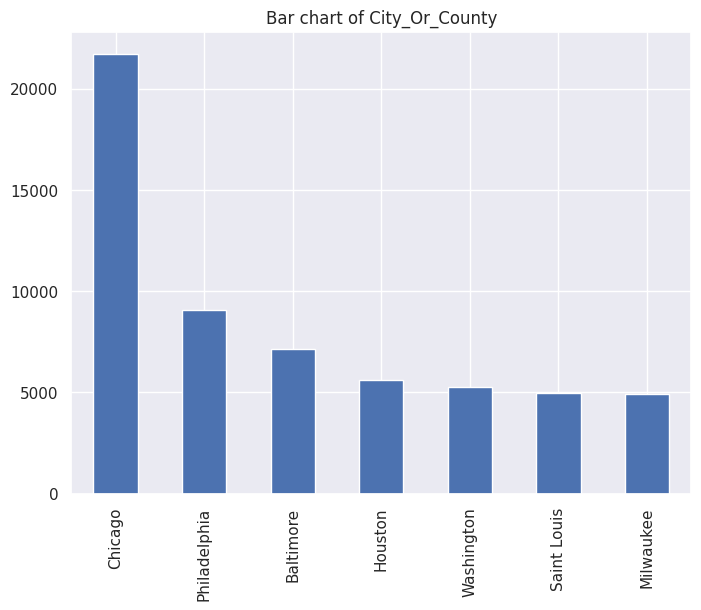

Class count of Address:

300 Indiana Ave                   132
Main St                           121
Main Street                       103
I-10                               87
I-95                               83
                                 ... 
Douglas Ln and Hightower Ave S      1
5200 Anisa Ct                       1
2700 Forbes St                      1
2900 Carleon Rd                     1
32390-32498 Red Hill Rd             1
Name: Address, Length: 349738, dtype: int64


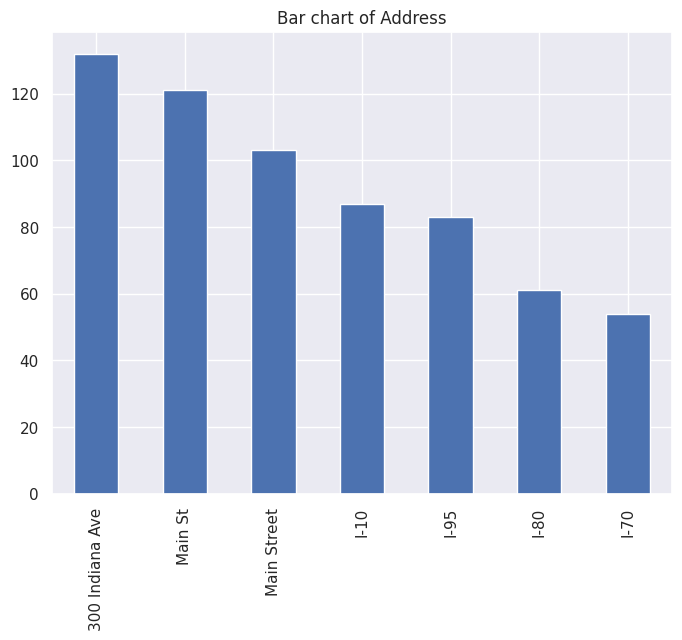

Class count of Day_Of_Week:

Sunday       67051
Saturday     64924
Monday       58309
Friday       57692
Wednesday    57360
Tuesday      57182
Thursday     56175
Name: Day_Of_Week, dtype: int64


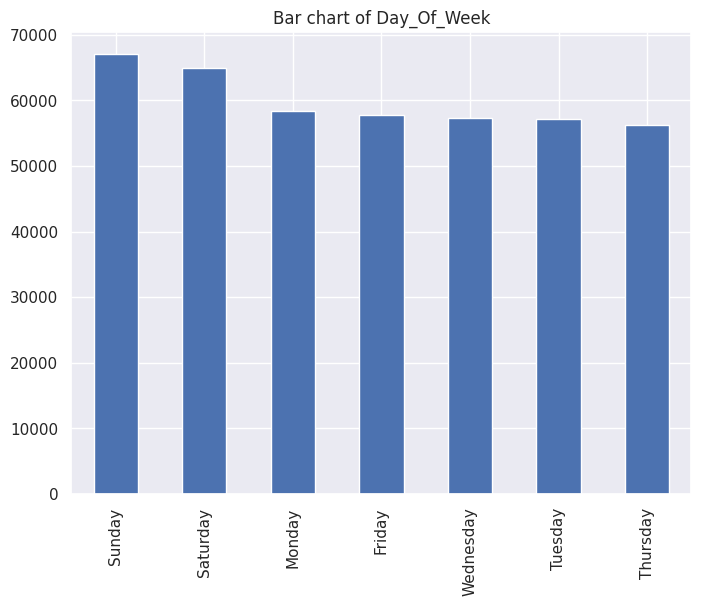

In [ ]:
# ID not included
for col in cat_col[1:]:
    analyzer.analyze_category_variable(col, df)

#### 1.2. Liên tục

- Phân tích đơn biến với biến liên tục thông qua :

   - Các thông tin thống kê: Mean, Median, Mode, Min, Max và Range

   - Các thông tin thống kê liên quan đến sự phân tán dữ liệu như : Range, Q1, Q3 , IQR, phương sai, độ lệch, độ nhọn của phân phối

   - Trực quan hóa bằng histogram và boxplot

#### Nhóm không sử dụng `analyzer.analyze_numeric_variable(...)` vì dữ liệu cũng như đồ thị trực quan trả về vẫn chưa đầy đủ và cụ thể lắm, nên nhóm sẽ tự thiết kế lại.

- Ý nghĩa các dòng:

    * `"missing_values": ` số lượng giá trị thiếu
    * `"missing_ratios": ` tỉ lệ giá trị thiếu
    * `"count": ` số lượng giá trị

    * `"mean": ` giá trị trung bình
    * `"std": ` độ lệch chuẩn
    * `"min": ` giá trị nhỏ nhất
    * `"25%": ` giá trị phân vị 25%
    * `"50%": ` giá trị phân vị 50%
    * `"75%": ` giá trị phân vị 75%
    * `"max": ` giá trị lớn nhất
    * `"iqr": ` độ trải giữa
    * `"modes": ` giá trị xuất hiện nhiều nhất
    * `"range": ` max - min
    * `"skew": ` độ lệch
    * `"var": ` phương sai
    * `"kurtosis": ` độ nhọn phân phối

In [ ]:
median = []
ranges = []
skew = []
var = []
kurtosis = []
iqr = []
modes = []
num_col = ['Killed', 'Injured', 'Total']

# Year & Month & DoW not included
for col in num_col:
    modes.append(st.mode(df[col]))
    iqr.append(df[col].quantile(.75) - df[col].quantile(.25))
    ranges.append(df[col].max() - df[col].min())
    skew.append(df[col].skew())
    var.append(df[col].var())
    kurtosis.append(df[col].kurtosis())


list = [modes, iqr, ranges, skew, var, kurtosis]
num_col_info_df = pd.DataFrame(data = list, columns = (['Killed', 'Injured', 'Total']))
num_col_info_df.index = ['mode', 'iqr', 'range', 'skew', 'var', 'kurtosis']

num_col_info_df = pd.concat([summary_df, num_col_info_df])

num_col_info_df.round(2)

,Killed,Injured,Total
missing_ratio,0.0,0.0,0.0
count,418693.0,418693.0,418693.0
mean,0.3,0.58,0.88
std,0.55,1.02,1.13
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,1.0
75%,1.0,1.0,1.0
max,59.0,441.0,500.0
mode,"([0], [306488])","([0], [219494])","([1], [238844])"


    - Lệch trái: Mean < Median < Mode.

    - Lệch phải: Mode < Median < Mean.

    - Đối xứng: Mode = Mean = Median

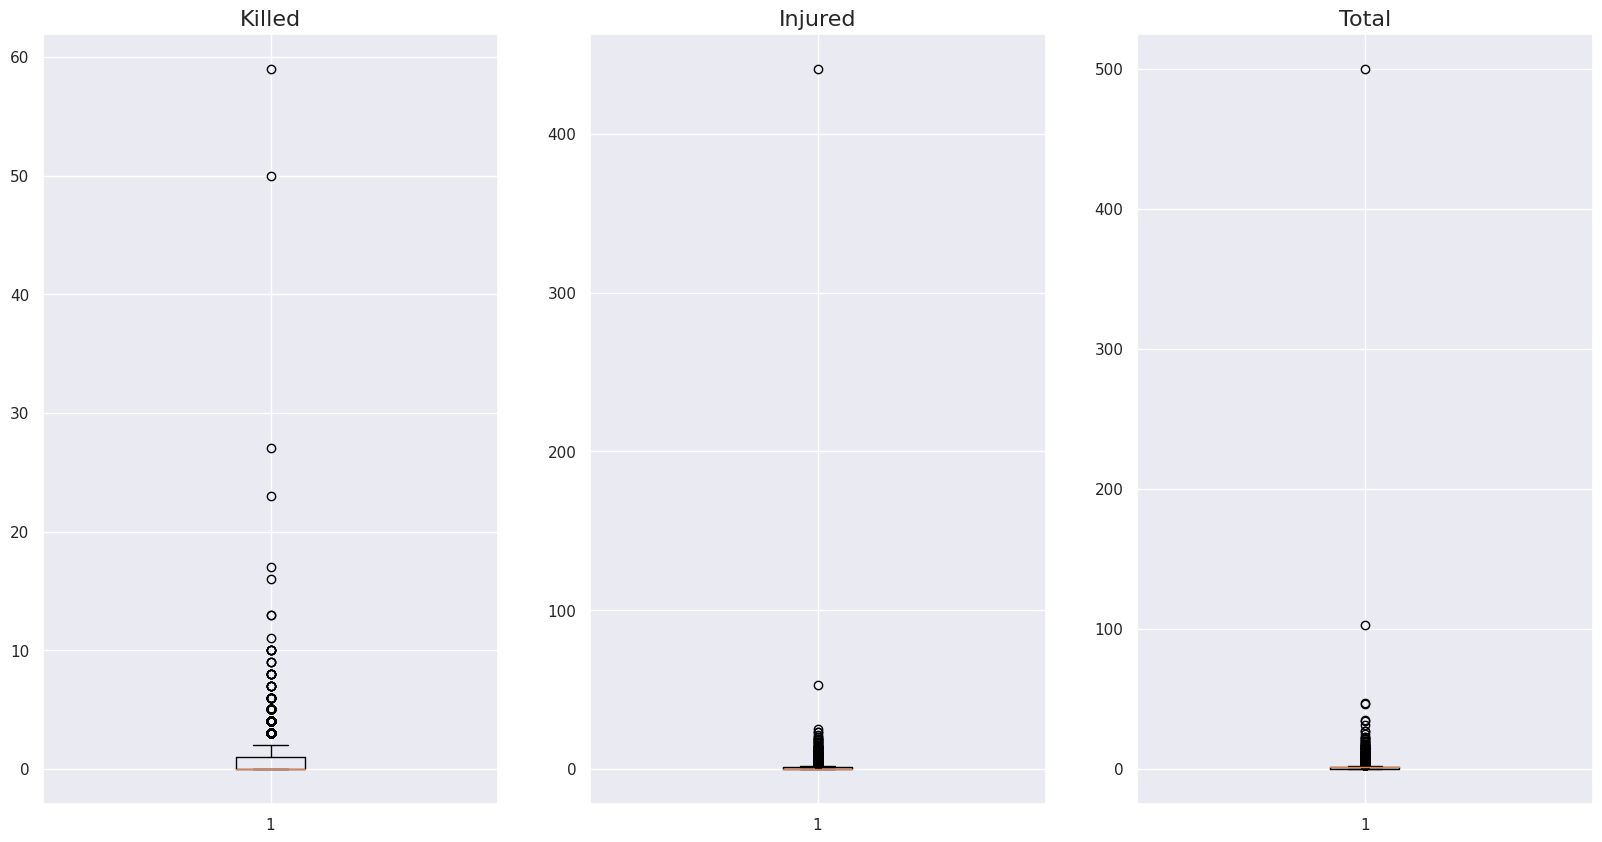

In [ ]:
k = 0
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
for col in num_col:
    ax[k].boxplot(df[col])
    ax[k].set_title(col, fontsize = 16)

    k += 1
plt.show()

### 2. Phân tích đa biến
#### 2.1. Phân loại vs phân loại

- Phân tích đa biến phân loại vs phân loại thông qua :

    - Xây dựng bảng 2 chiều (two-way table)
    
    - Trực quan hóa bằng biểu đồ cột chồng (stacked columns bar)

    - Thực hiện phân tích thống kê bằng chi2

##### B1: Xây dựng bảng 2 chiều

In [ ]:
tw_table = pd.crosstab(df['State_Code'], df['Year'])

tw_table

Year,2014,2015,2016,2017,2018,2019,2020,2021
State_Code,,,,,,,,
AK,91,309,390,267,232,140,98,103
AL,1021,941,1203,1398,1308,1301,1167,1204
AR,424,454,638,767,777,710,624,539
AZ,402,390,523,579,534,622,792,748
CA,3093,2897,3388,4354,3655,3197,3497,3344
CO,358,629,727,774,762,688,814,804
CT,411,675,743,714,778,752,790,622
DC,388,439,428,558,654,713,995,894
DE,329,324,302,382,360,417,389,271


##### B2: Trực quan hóa bằng biểu đồ cột chồng (stacked columns bar)

<Axes: xlabel='State_Code'>

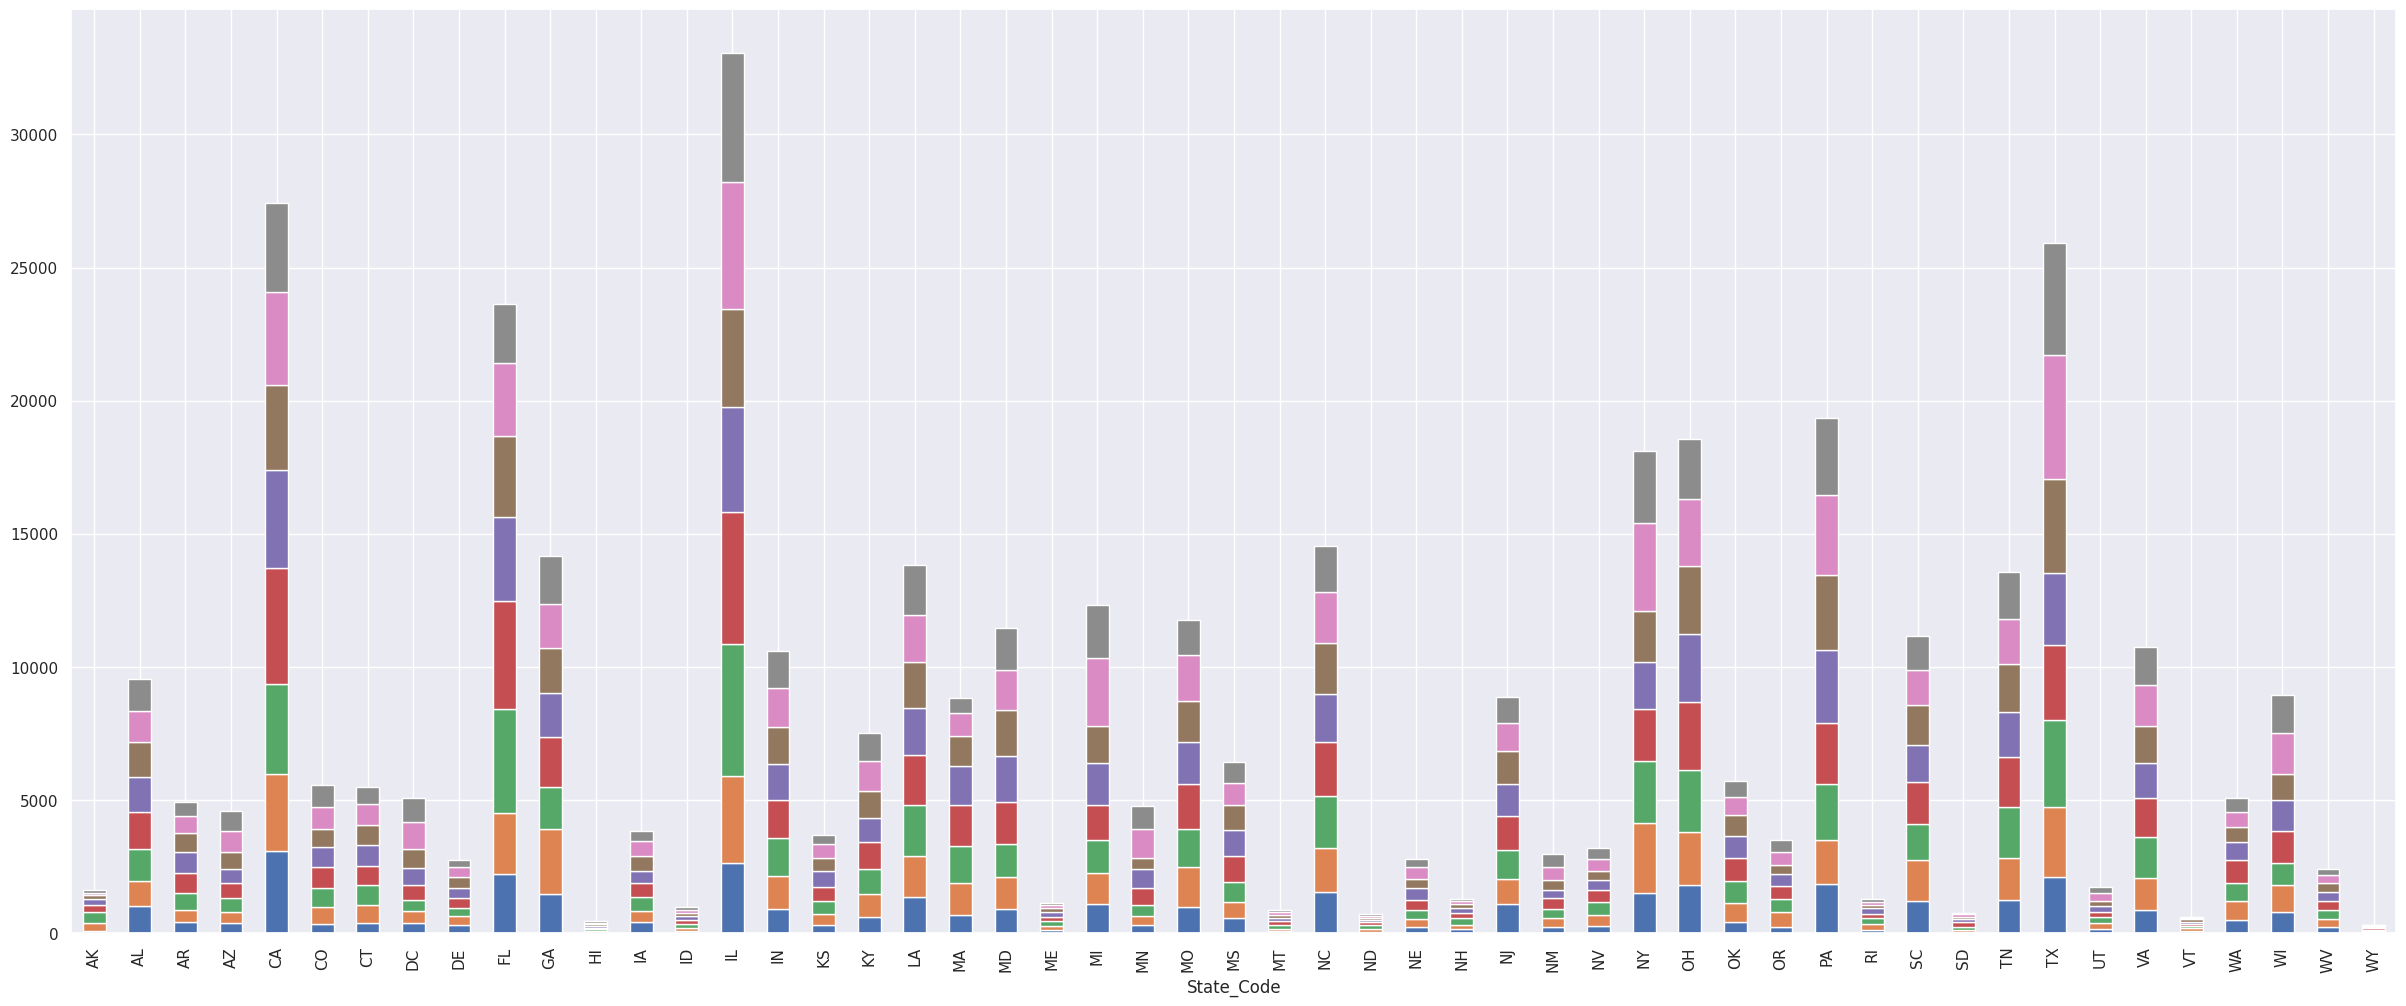

In [ ]:
tw_table.plot(kind = 'bar', stacked = True, legend = False, figsize = (30, 12))

##### B3: Phân tích thống kê chi² (kiểm định chi bình phương / chi-square) để kiểm tra biến `độc lập` hay `phụ thuộc`.

- `chi2_contigency`: Hàm này tính toán thống kê chi bình phương và p-value cho phép kiểm tra giả thuyết về tính độc lập của các tần số được quan sát.

- Giả thuyết:

        - H0: 2 biến độc lập
        - Bác bỏ H0: 2 biến phụ thuộc


In [ ]:
from scipy.stats import chi2_contingency

def use_chi_2_evaluation(tw_table, prob):
    """
    Use chi2 to check 2 category in two-way table Dependent or not
    parameter tw_table: two-way table of 2 category variable
    parameter prob: percent of chance that accept null hypothesis (H0-2 variable independent)
    """
    stats, p, dof, expected = chi2_contingency(tw_table)
    alpha = 1 - prob
    if p <= alpha:
        return 'Reject H0 - Dependent'
    else:
        return 'Fail to reject H0 - Independent'

In [ ]:
use_chi_2_evaluation(tw_table, 0.95)

'Reject H0 - Dependent'

#### 2.2. Liên tục vs phân loại

- Phân tích đa biến liên tục vs phân loại thông qua:

   - Xây dựng bảng ANOVA và phân tích thống kê.
   
   - Trực quan hóa bằng box plot.

##### - `Kiểm định ANOVA (ANOVA test)` hay còn được gọi là `phân tích phương sai (Analysis of Variance)` là một kỹ thuật thống kê tham số được sử dụng để phân tích sự khác nhau giữa giá trị trung bình của các biến phụ thuộc với nhau

| Tên biến trả về | Kiểu dữ liệu | Ý nghĩa|
|                                -|            -|-|
sum_sq           |  float64      | Tổng bình phương cho các thuật ngữ mô hình.
df                  |  float64 | Bậc tự do
F                     |  float64     | Giá trị thống kê F `(là tỷ lệ biến thiên giữa các số trung bình mẫu và sự biến thiên trong nội bộ các mẫu)`
City_Or_County		           |  object     | Tên các thành phố hoặc quận diễn ra bạo lực tại Hoa Kỳ
PR(>F)          | float64 | Giá trị thống kê p (p-value)

- `C(Year)`: C = Constant, tức là không thay đổi.

- `Residual`: Sự khác biệt giữa giá trị quan sát và giá trị dự đoán trong mô hình hồi quy

                 sum_sq        df           F  PR(>F)
C(Year)     3423.787845       7.0  383.480772     0.0
Residual  534013.964661  418685.0         NaN     NaN


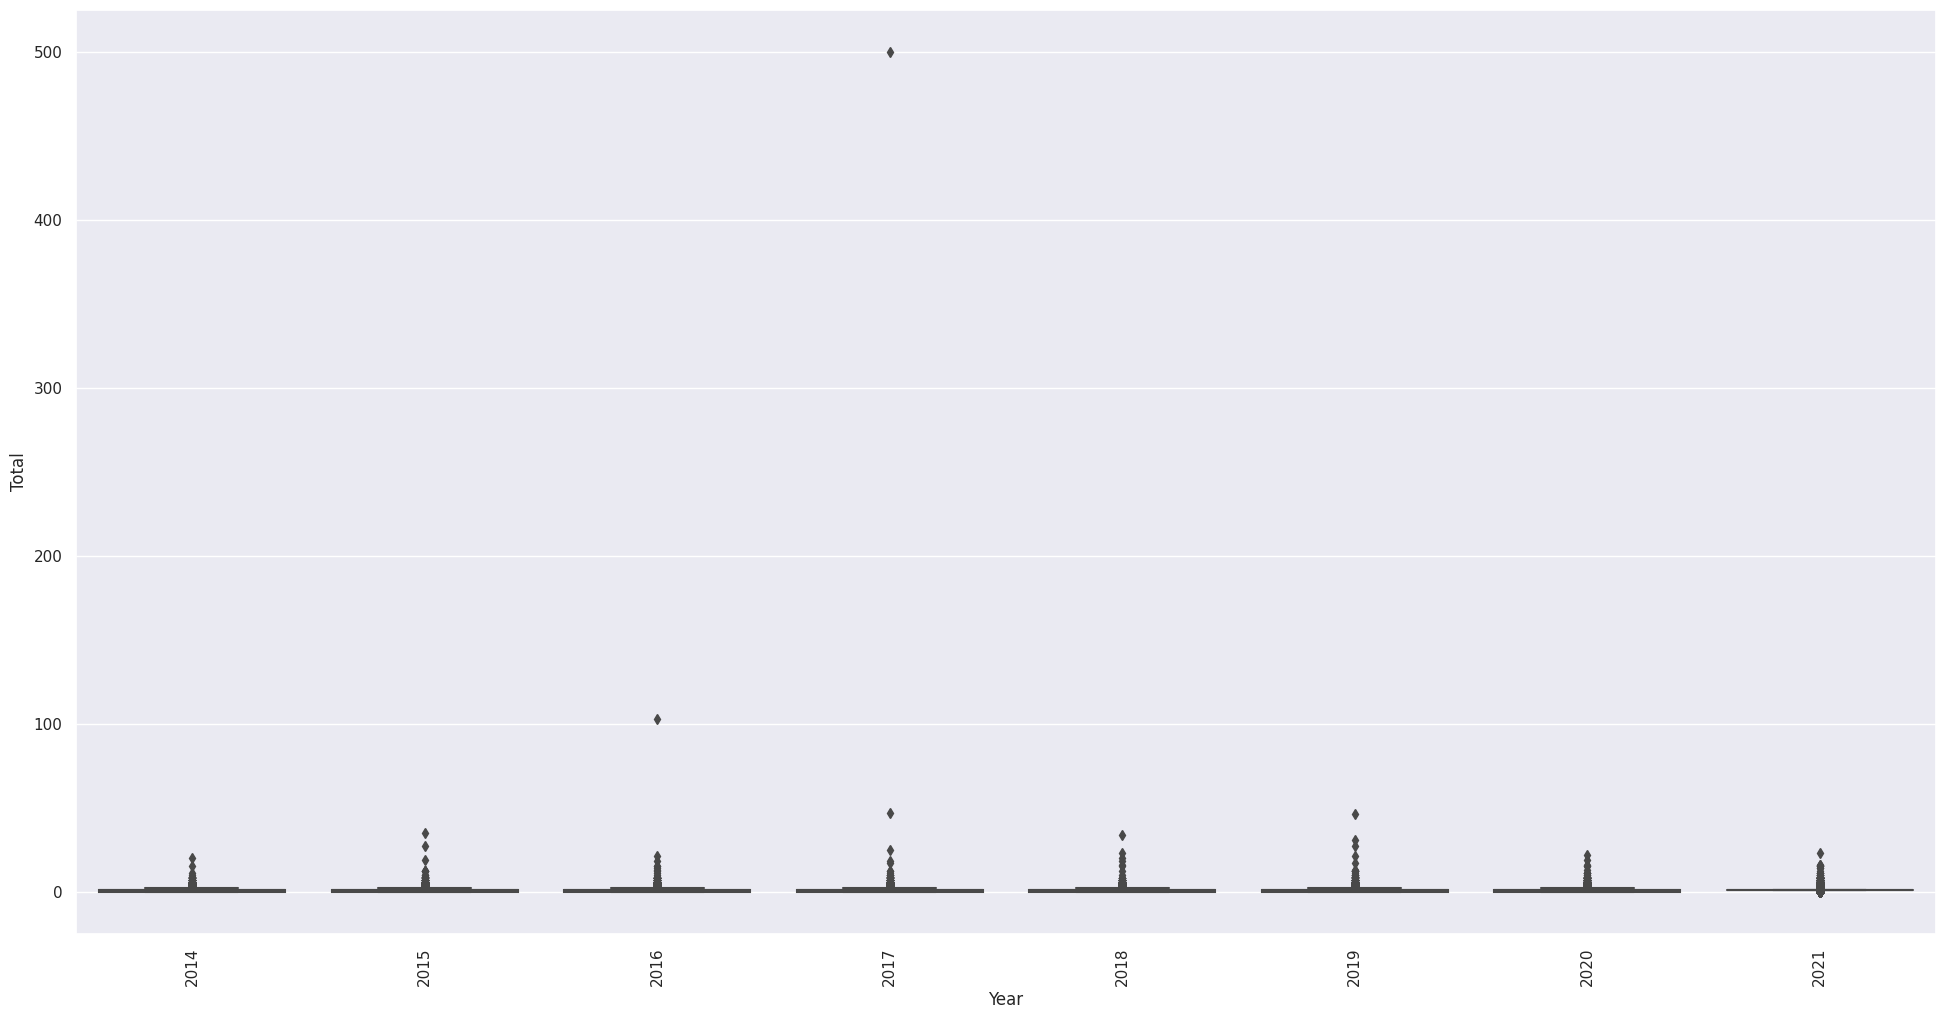

In [ ]:
fig = plt.subplots(figsize = (24, 12))
analyzer.analyze_continous_vs_categories('Total', 'Year', df)

### 3. Phân tích outlier của biến liên tục

In [ ]:
analyzer.check_outlier_of_numerical_variable('Total', df)

variable Total have 3.184% upper outlier
variable Total have 0.0% lower outlier


(Int64Index([  92148,   92174,   92194,   92292,   92328,   92405,   92479,
               92602,   92704,   92883,
             ...
             2201216, 2201351, 2201535, 2201716, 2201858, 2201887, 2203406,
             2205503, 2205731, 2401560],
            dtype='int64', name='Incident_ID', length=13332),
 Int64Index([], dtype='int64', name='Incident_ID'))

### 4. Phân tích hiện tượng mất cân bằng dữ liệu ở biến phân loại output

In [ ]:
analyzer.check_imbalance_class('Total', df)

Class count of Total:

1      0.570451
0      0.300273
2      0.097434
3      0.021933
4      0.006047
5      0.002095
6      0.000848
7      0.000430
8      0.000184
9      0.000093
10     0.000048
12     0.000033
11     0.000029
15     0.000021
16     0.000010
18     0.000007
13     0.000007
14     0.000007
21     0.000005
23     0.000005
17     0.000005
19     0.000005
27     0.000005
20     0.000005
103    0.000002
35     0.000002
25     0.000002
500    0.000002
47     0.000002
34     0.000002
46     0.000002
31     0.000002
22     0.000002
Name: Total, dtype: float64
Ratio of 2 class is 238844.0
You should consider to handle imbalance


#### Xử lý mất cân bằng dữ liệu - UnderSampling

## III. Trực quan hóa dữ liệu
### 1. Heatmap

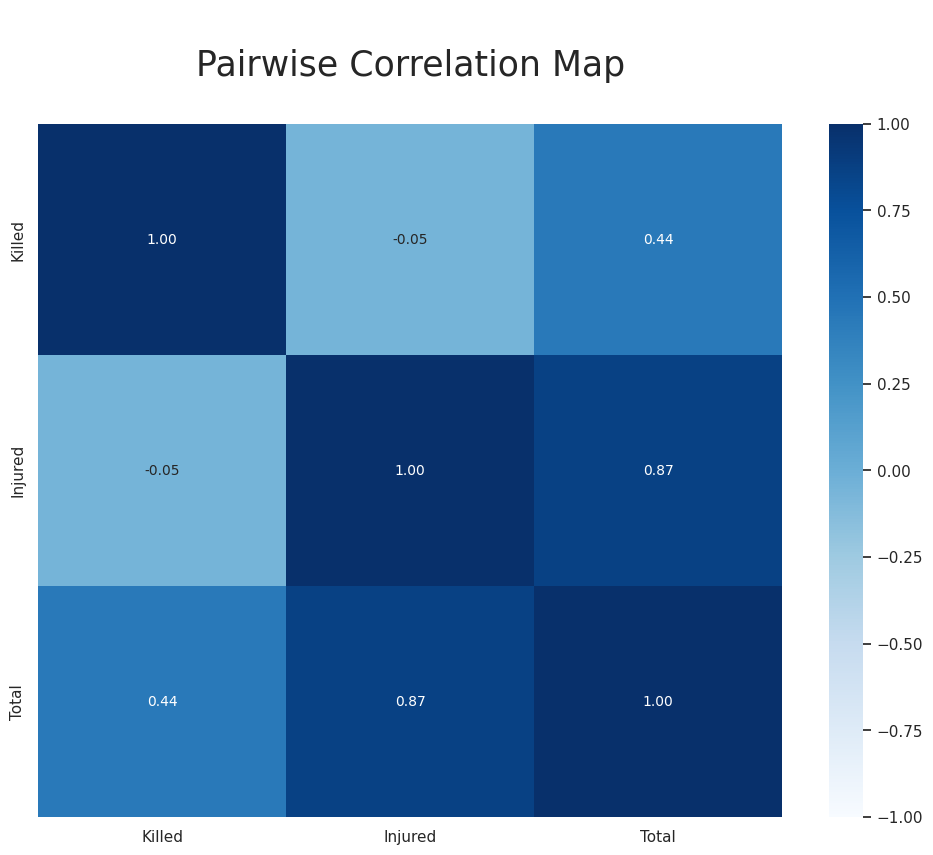

In [ ]:
sns.set_style("white")
matrix = df.iloc[:, :-4].corr()      # Year & Month & DoW not included
f,ax=plt.subplots(figsize = (matrix.shape[0] * 4,
                                matrix.shape[1] * 3))
sns.heatmap(df.iloc[:, :-4].corr(),
            annot= True,
            fmt = ".2f",
            ax=ax,
            vmin = -1,
            vmax = 1,
            cmap = "Blues",
            annot_kws={"size": 10})
plt.xticks(0.5 + np.arange(matrix.shape[0]), matrix.columns)
plt.yticks(0.5 + np.arange(matrix.shape[0]), matrix.columns)
plt.title('\nPairwise Correlation Map\n', size = 25)
plt.show()

### ` Nhận xét: `
   - Ta thấy `Injured` ảnh hưởng tới `Total` nhiều hơn là `Killed`

   - `Injured` và `Killed` không ảnh hưởng gì nhiều tới nhau.

### 2. Barchart

- Chúng ta tiến hành trực quan thêm bằng barchart để làm rõ hơn các mối tương quan này, đồng thời có cái nhìn trực quan hơn về dữ liệu.

<h2 style='color:#6ac61f'> Câu hỏi 1: Xu hướng các vụ nổ súng theo các năm, quý, tháng và các ngày trong tuần ở mỹ là như thế nào? </h2>

### **- Thống kê theo năm**

In [ ]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

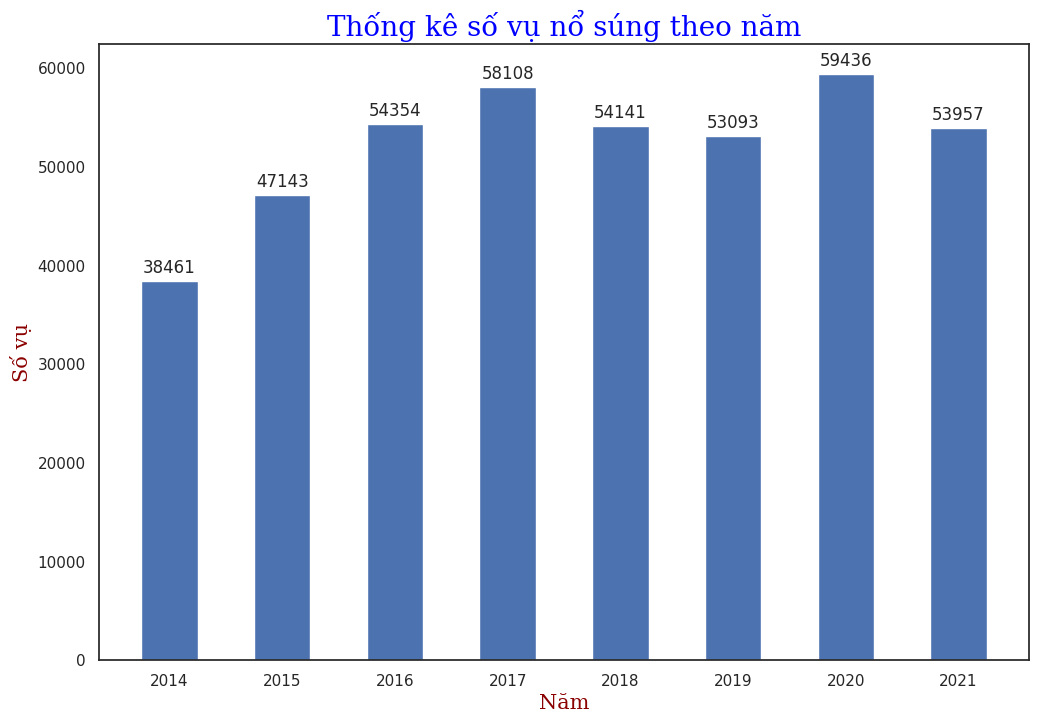

In [ ]:
number_y = df.groupby(['Year']).size()
labels_y = pd.Series(df['Year'].unique()).sort_values()
x_y = np.arange(2014, 2022)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

rects1 = ax.bar(x_y, number_y, 0.5)

ax.set_ylabel('Số vụ', fontdict = font2)
ax.set_xlabel('Năm', fontdict = font2)
ax.set_title('Thống kê số vụ nổ súng theo năm', fontdict = font1)
ax.set_xticks(x_y)

ax.bar_label(rects1, padding = 3)

fig.savefig("year_number.png")
plt.show()

#### `Nhận xét:` Số vụ nổ súng tăng mạnh từ năm 2014-2017. Nhưng lại giảm từ năm 2017-2019 nhưng tốc độ giảm không bằng so với lúc tăng trước đây. Nhưng lại tăng mạnh chỉ sau đó 1 năm rùi tới năm 2021 lại giảm. Tăng mạnh nhất từ năm 2014-2015 (tăng gần 9000 vụ nổ súng).

### **- Thống kê theo quý**

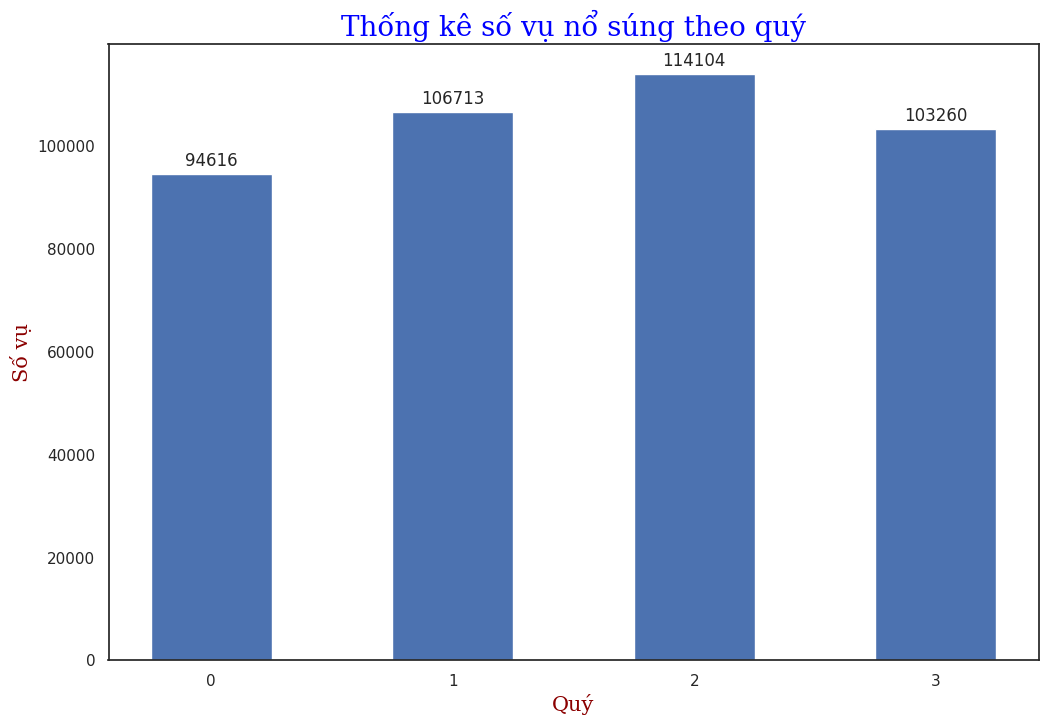

In [ ]:
number_q = df.groupby(['Quarter']).size()
labels_q = pd.Series(df['Quarter'].unique()).sort_values()
x_q = np.arange(len(range(1, 5)))
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

rects1 = ax.bar(x_q, number_q, 0.5)

ax.set_ylabel('Số vụ', fontdict=font2)
ax.set_xlabel('Quý', fontdict=font2)
ax.set_title('Thống kê số vụ nổ súng theo quý', fontdict=font1)
ax.set_xticks(x_q)

ax.bar_label(rects1, padding=3)

fig.savefig("quarter_number.png")

plt.show()

#### `Nhận xét:` Số vụ nổ súng diễn ra nhiều nhất ở quý 3 sau đó tới quý 2, quý 4 và thấp nhất là quý 1.

### **- Thống kê theo tháng**

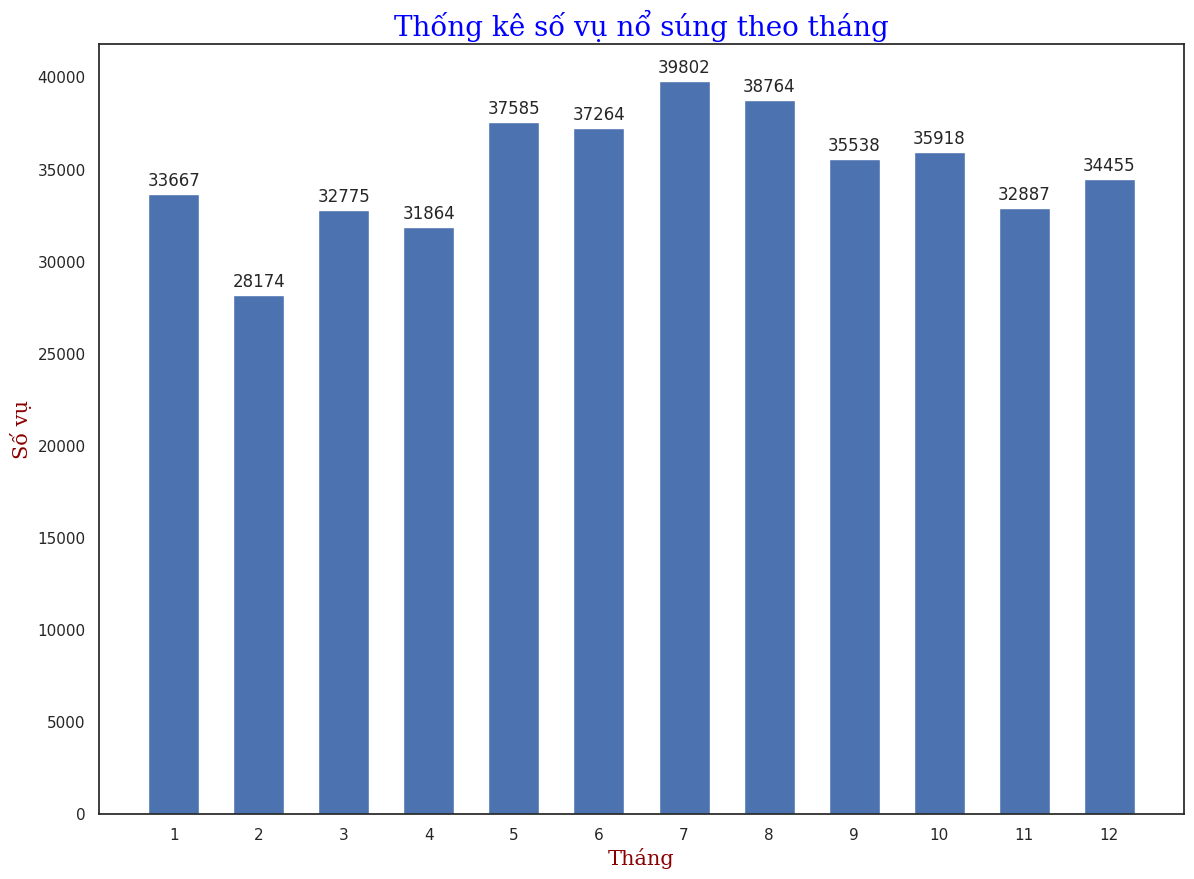

In [ ]:
number_m = df.groupby(['Month']).size()
labels_m = pd.Series(df['Month'].unique()).sort_values()
x_m = np.arange(1, 13)
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)

rects1=ax.bar(x_m, number_m, 0.6)

ax.set_ylabel('Số vụ', fontdict = font2)
ax.set_xlabel('Tháng', fontdict = font2)
ax.set_title('Thống kê số vụ nổ súng theo tháng', fontdict = font1)
ax.set_xticks(x_m)

ax.bar_label(rects1, padding=3)

fig.savefig("month_number.png")

plt.show()

#### `Nhận xét:` 3 tháng xảy ra ít vụ nổ súng nhất là tháng 2, tháng 3, tháng 4. Trong đó tháng 2 là thấp nhất có lẽ bởi là ít ngày nhất trong năm. 3 tháng xảy ra nhiều vụ nổ súng nhất là tháng 5, tháng 7, tháng 8. Trong đó tháng 7 là tháng xảy ra nhiều vụ nhất trong tất cả các tháng

### **- Thống kê theo các ngày trong tuần:**

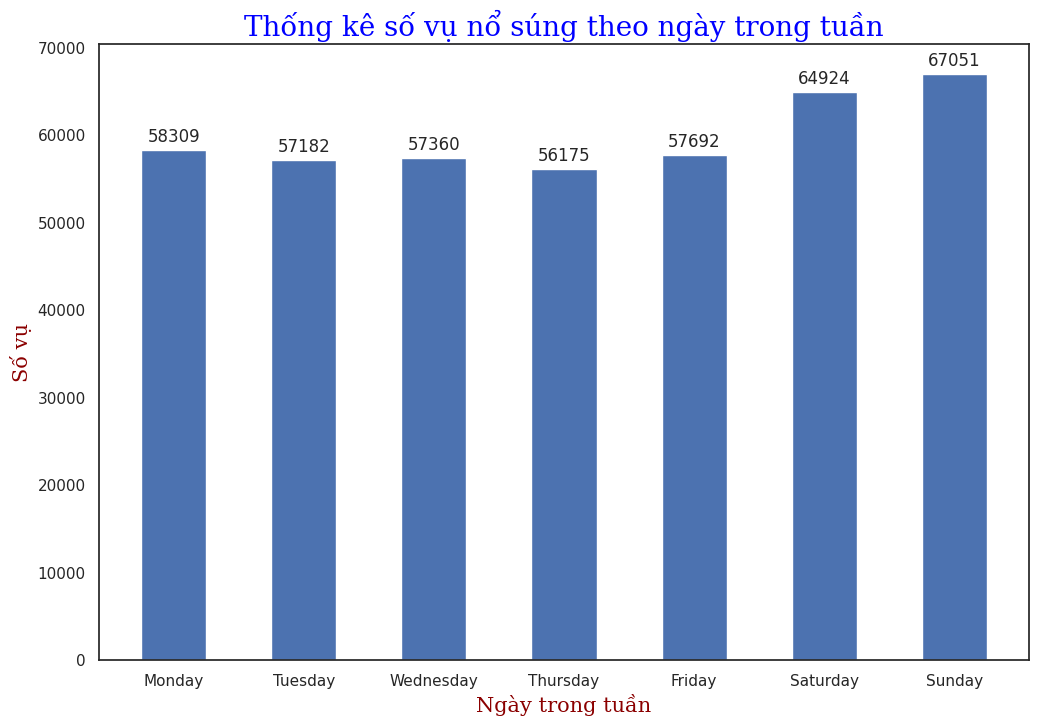

In [ ]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
number_d = df.groupby(['Day_Of_Week']).size().reindex(cats)
labels_d = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_d = np.arange(1, 8)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)

rects1 = ax.bar(labels_d, number_d, 0.5)

ax.set_ylabel('Số vụ', fontdict = font2)
ax.set_xlabel('Ngày trong tuần', fontdict = font2)
ax.set_title('Thống kê số vụ nổ súng theo ngày trong tuần', fontdict = font1)

ax.bar_label(rects1, padding=3)

fig.savefig("day_number.png")

plt.show()

#### `Nhận xét:` Số lượng vụ nổ súng xảy ra nhiều trong các ngày cuối tuần (thứ 7 và chủ nhật), các ngày còn lại cũng xảy ra nhưng không chênh lệch nhau quá nhiều và không nhiều bằng 2 ngày cuối tuần.

<h2 style='color:#6ac61f'> Câu hỏi 2: Thiệt hại về người từ các vụ nổ súng theo năm, quý, tháng và ngày trong tuần ở Mỹ là như thế nào? </h2>

In [ ]:
def incident_plot(df, col, title):
    dict = []

    for i in range(df[col].min(), df[col].max() + 1):
        dict1 = df[df[col] == i]
        dict.append(dict1[['Killed', 'Injured', 'Total']].sum())

    labels = df[col].unique()
    killed = []
    injured = []
    total = []

    for i in range(len(labels)):
        killed.append(dict[i]['Killed'])
        injured.append(dict[i]['Injured'])
        total.append(killed[i] + injured[i])

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (24, 12))
    rects1 = ax.bar(x - width/2 - 0.1, killed, width, label = 'Killed')
    rects2 = ax.bar(x + width/2 - 0.1, injured, width, label = 'Injured')
    rects3 = ax.bar(x + width/2 + 0.2, total, width, label = 'Total')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Thiệt hại về người', fontsize = 20)
    ax.set_title('Thống Kê Thiệt Hại Về Người Theo ' + title, fontsize = 30)
    ax.set_xlabel(title, fontsize = 20)


    # set amounts
    ax.bar_label(rects1, padding = 3)
    ax.bar_label(rects2, padding = 3)
    ax.bar_label(rects3, padding = 3)

    ax.set_xticks(x)
    ax.set_xticklabels(range(df[col].min(), df[col].max() + 1))

    fig.tight_layout()

    fig.savefig(title)

    # PLOT
    ax.legend(fontsize = 20)
    plt.show()

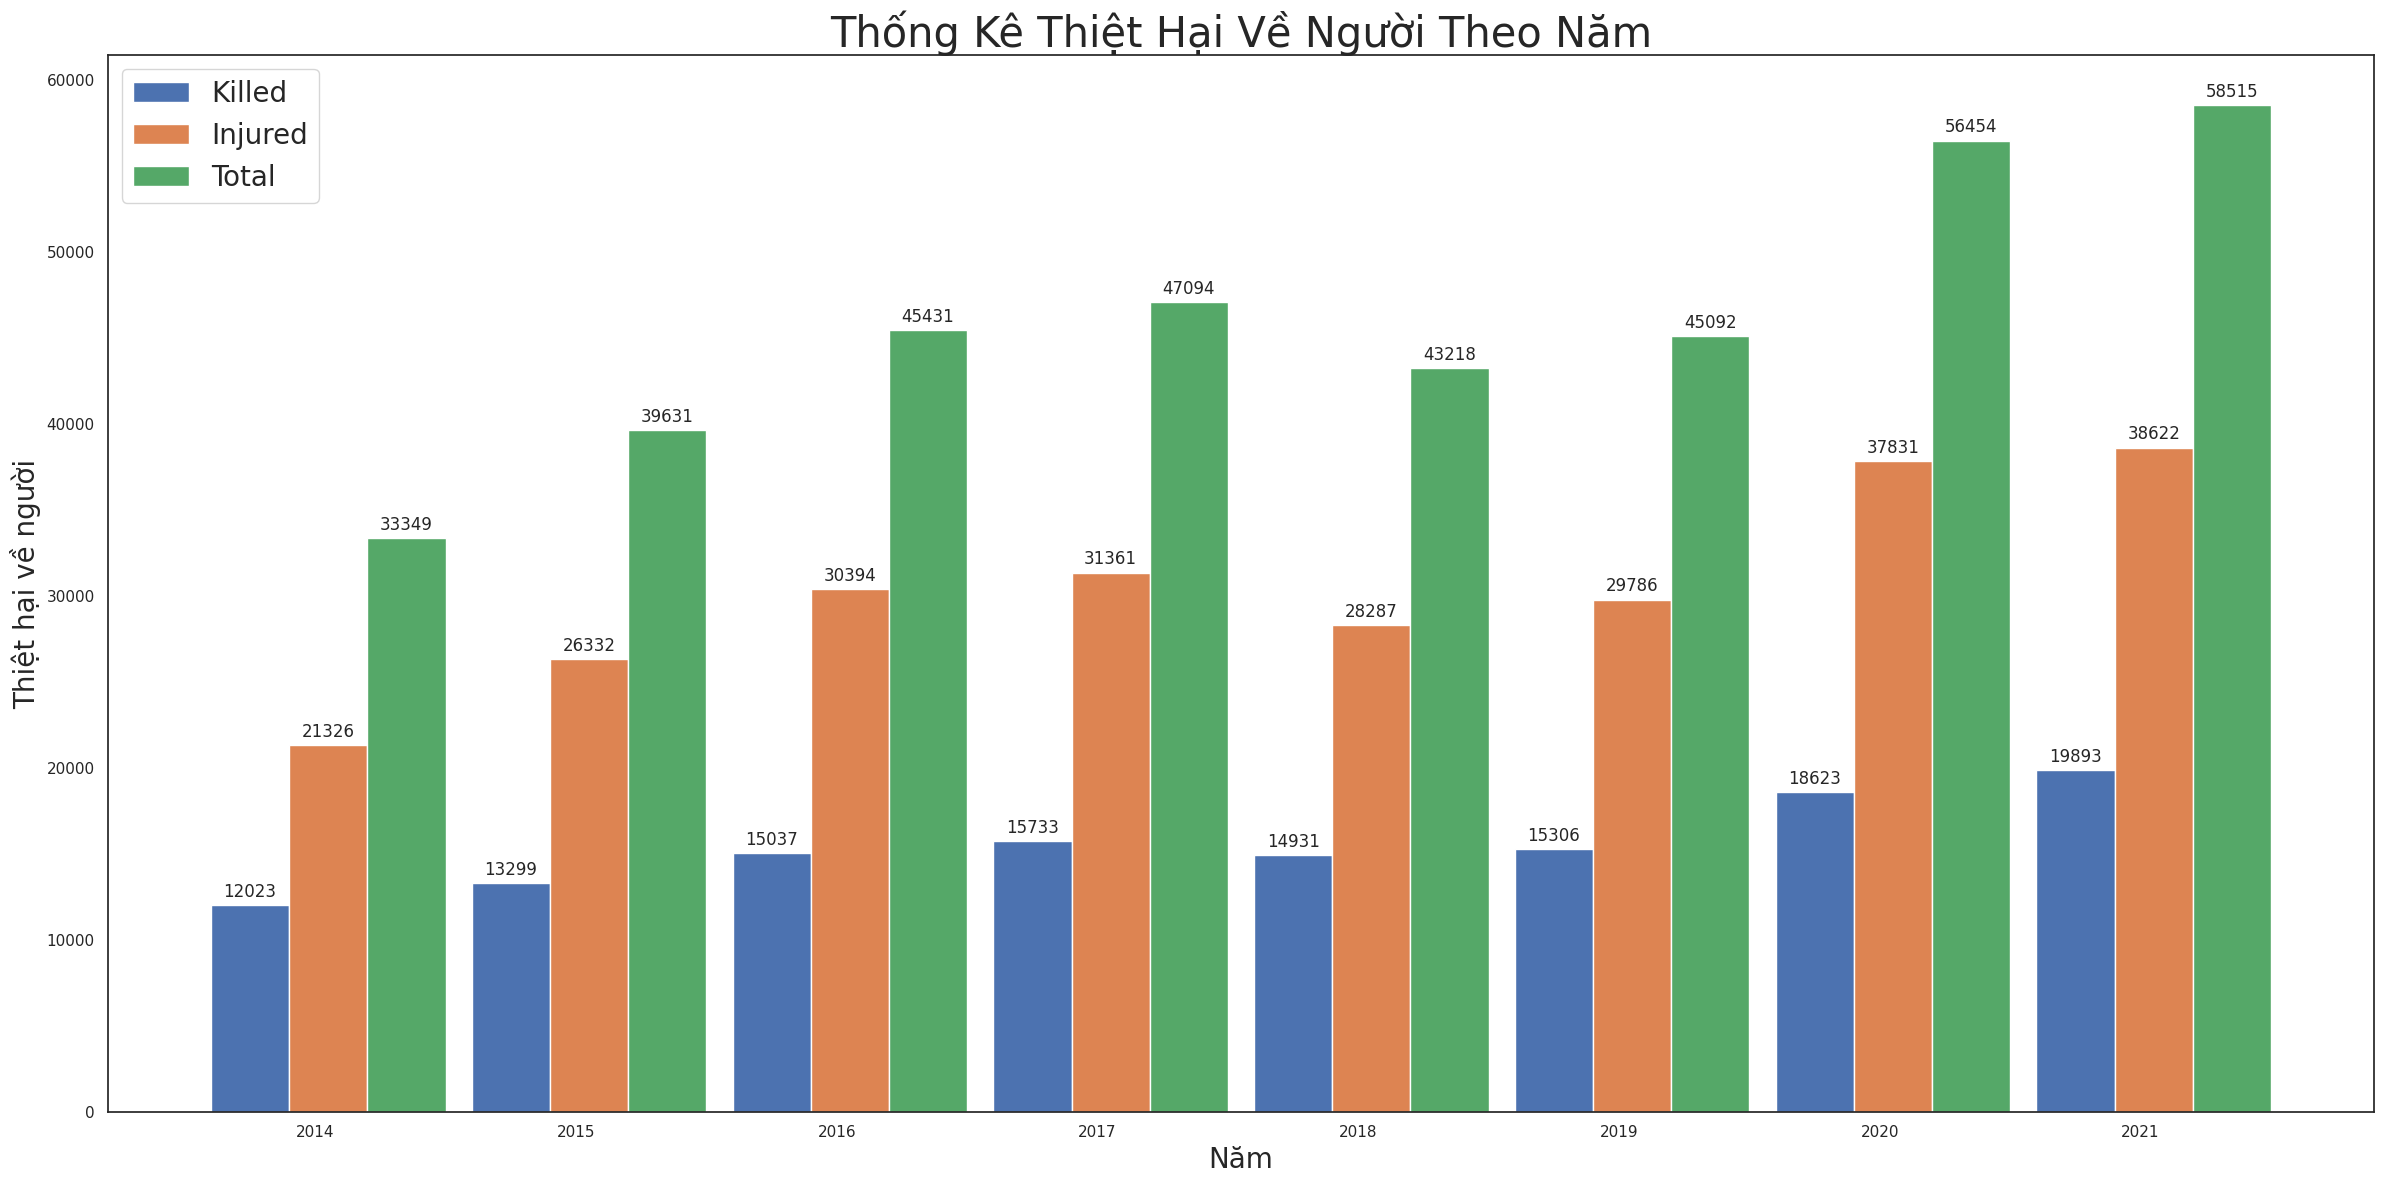

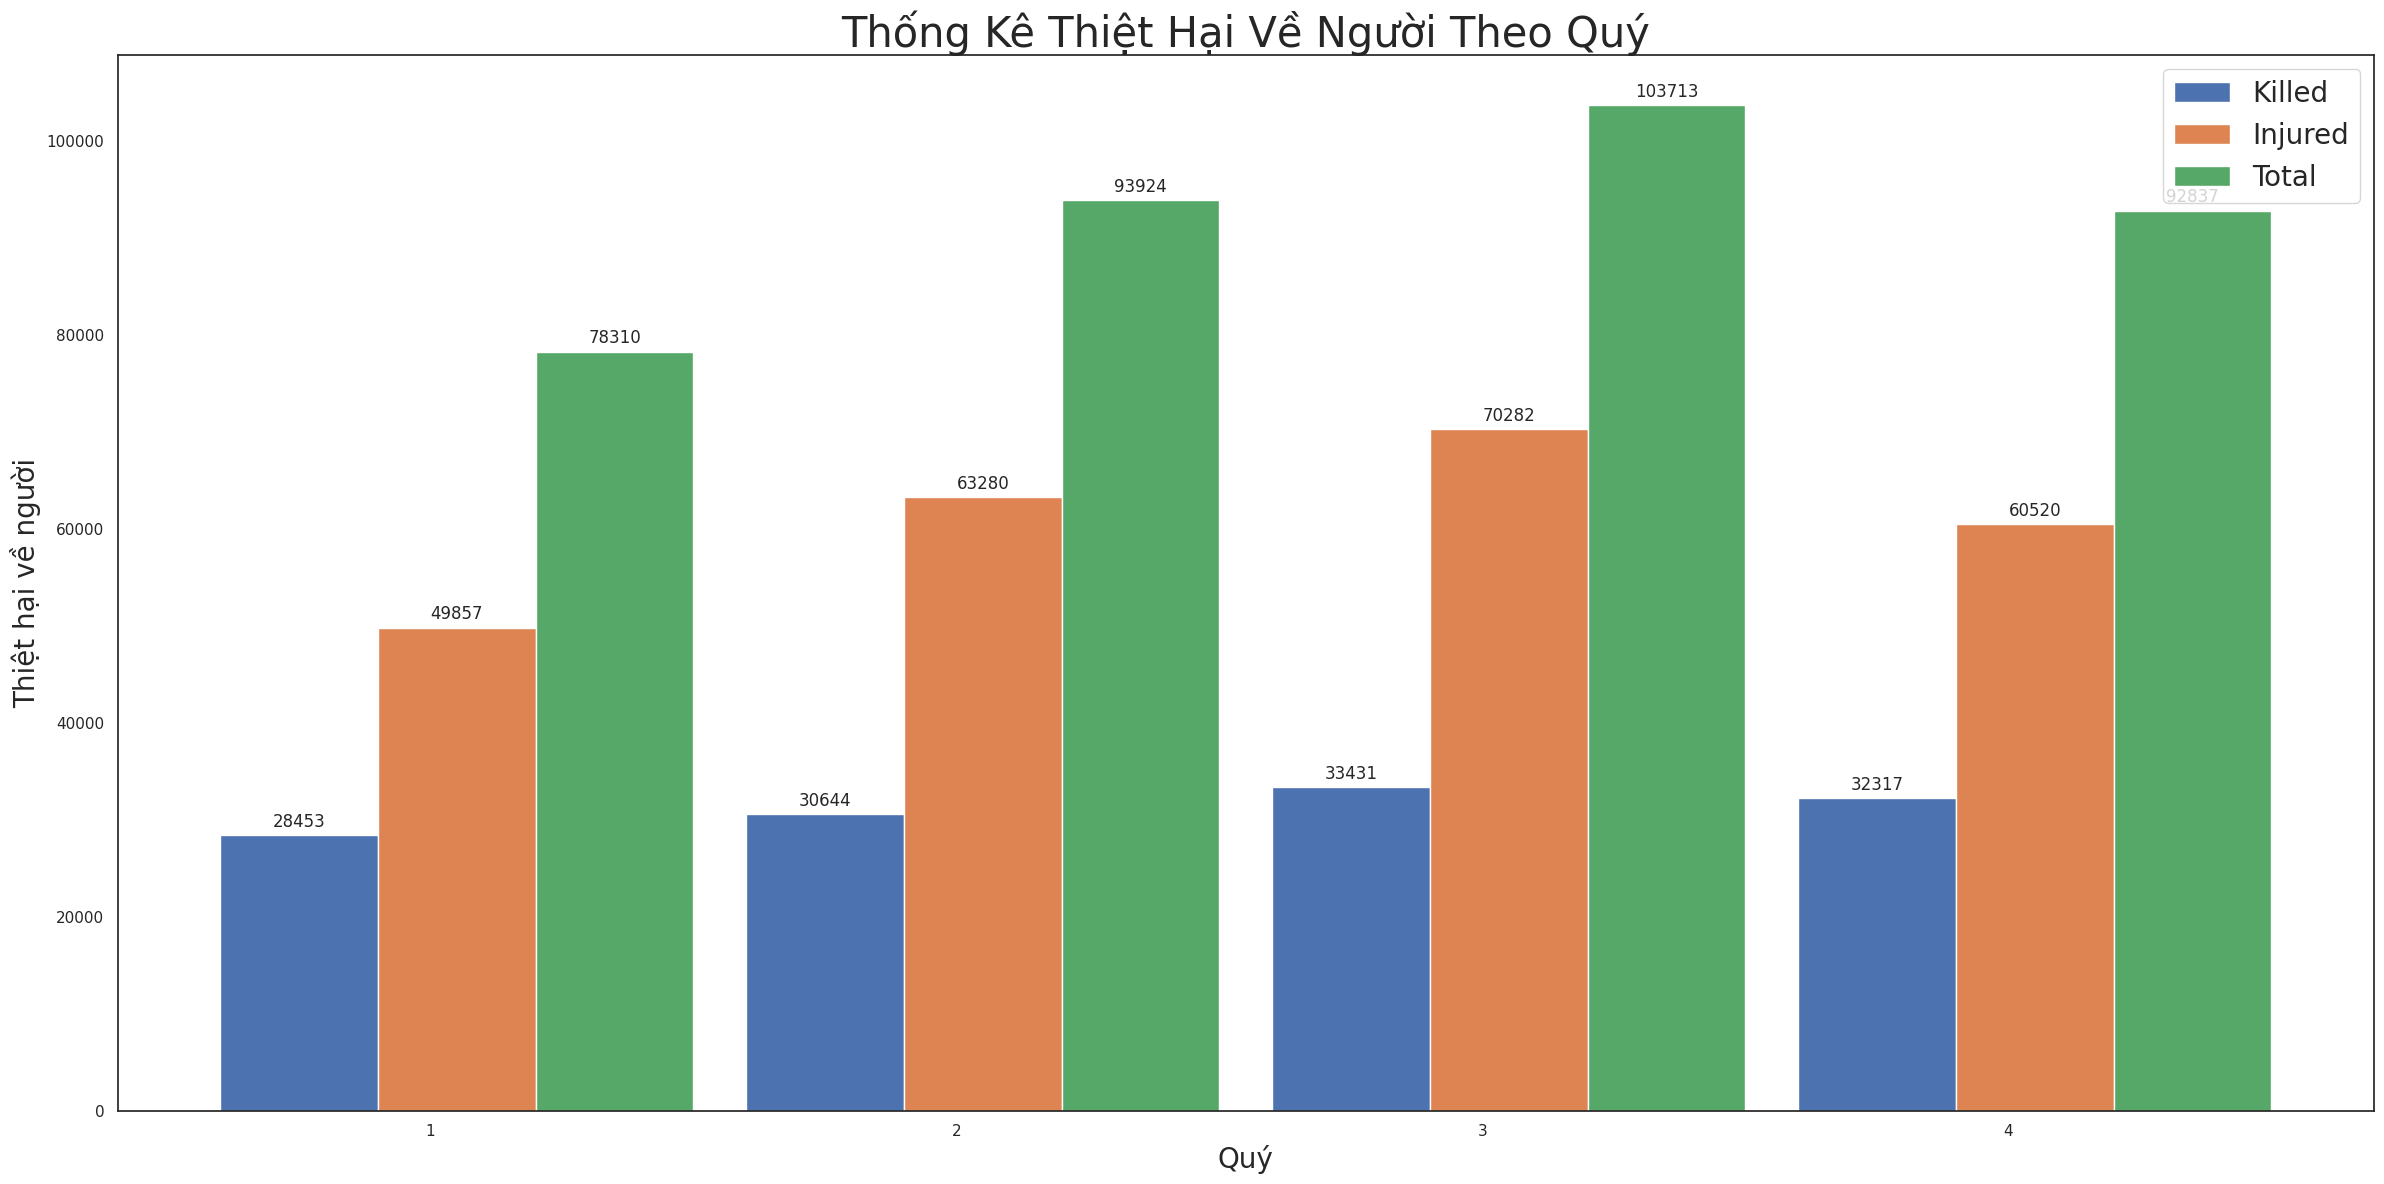

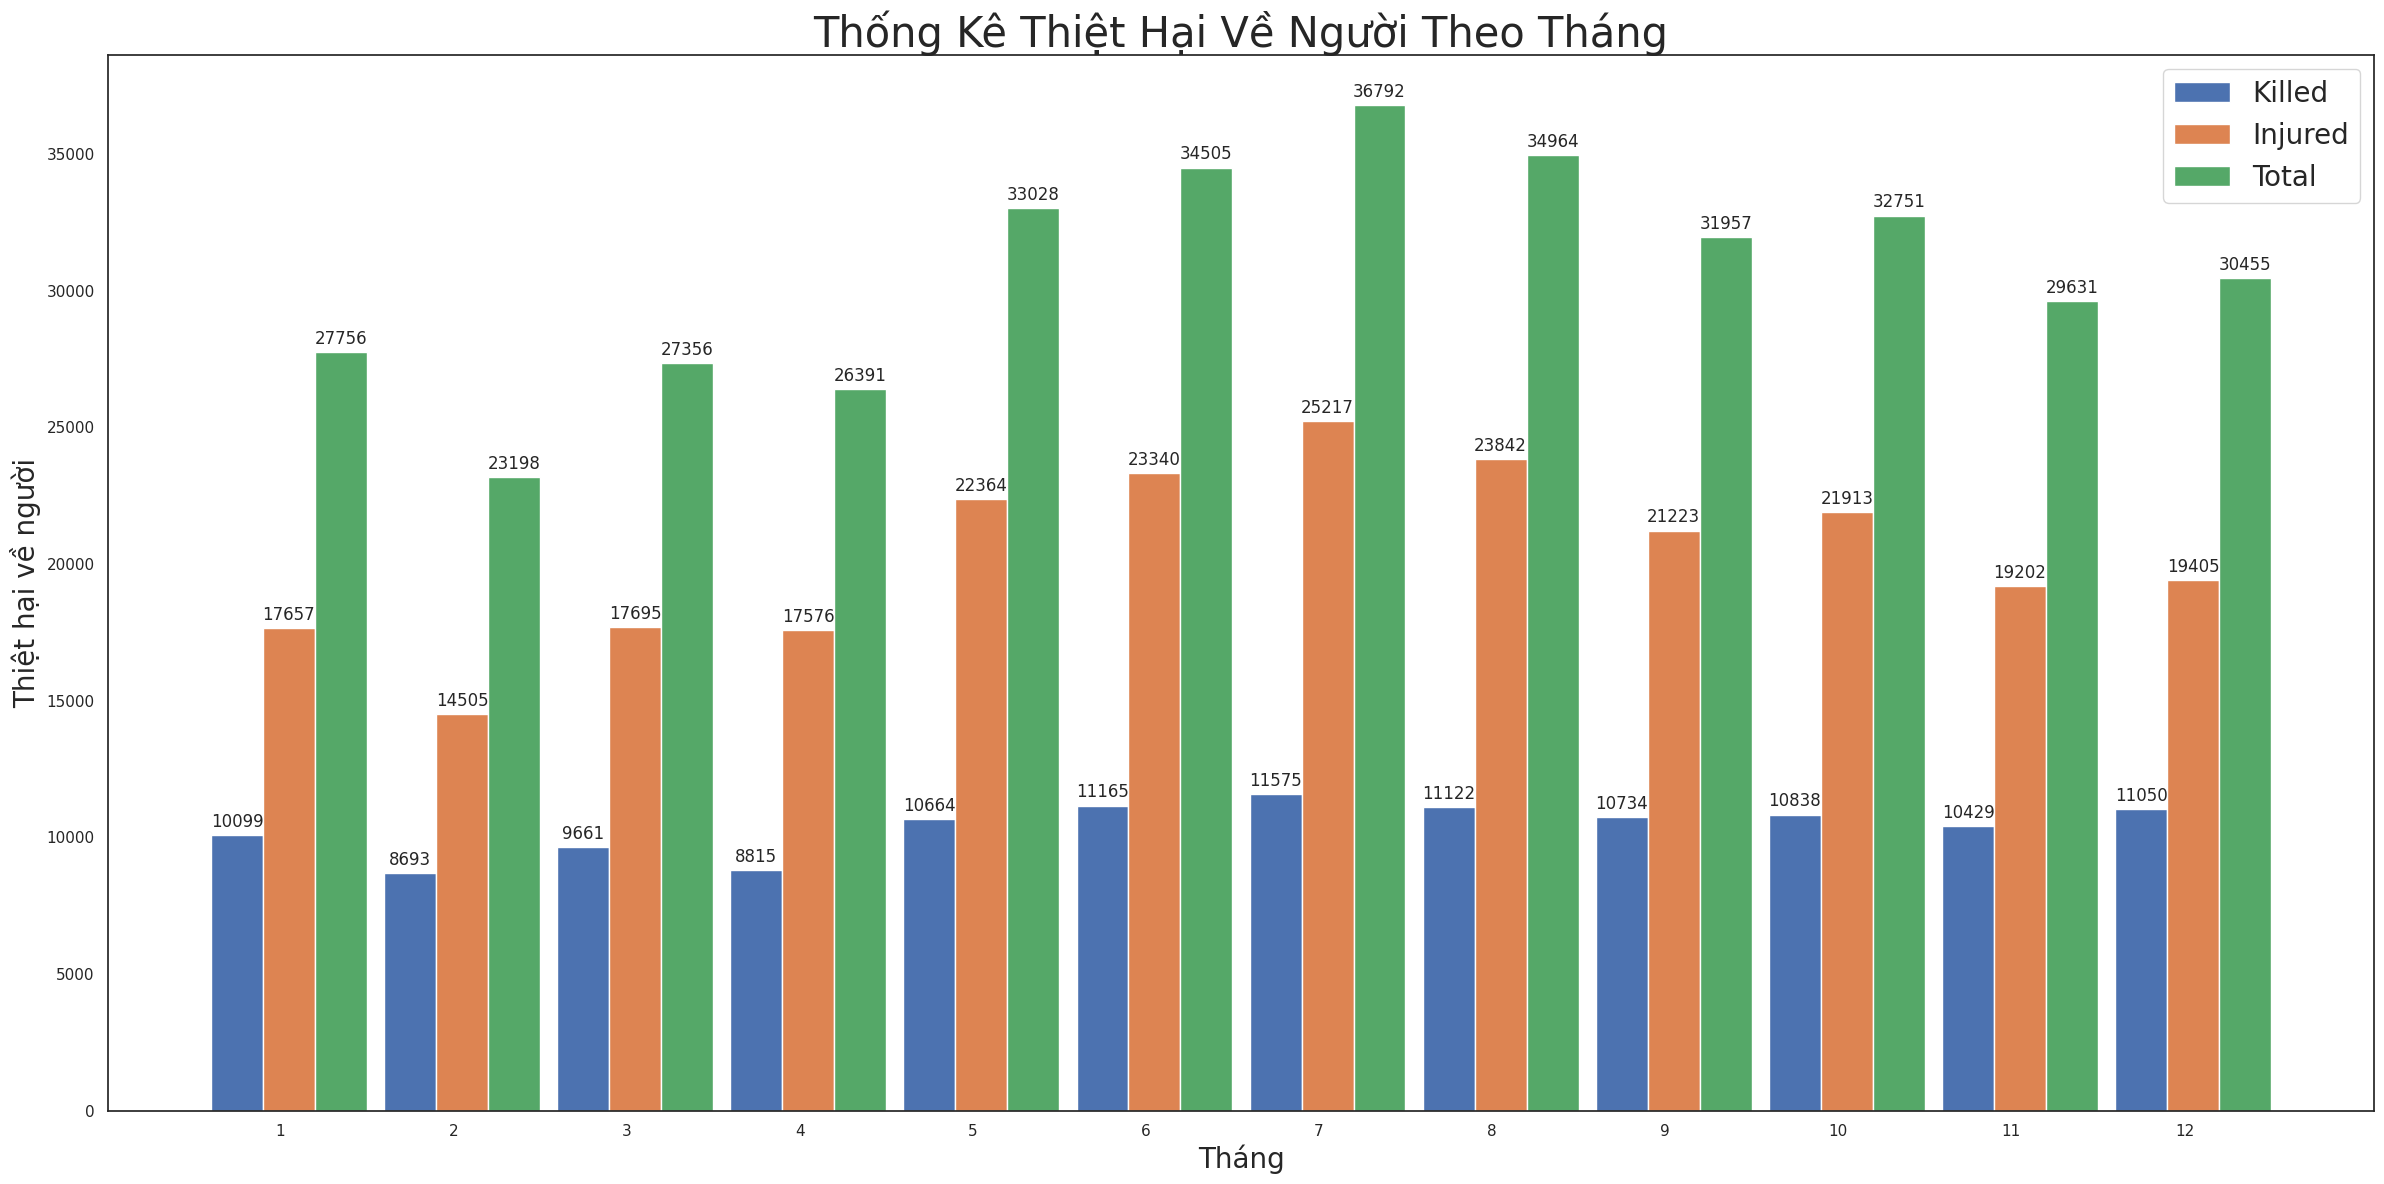

In [ ]:
incident_plot(df, 'Year', 'Năm')
incident_plot(df, 'Quarter', 'Quý')
incident_plot(df, 'Month', 'Tháng')

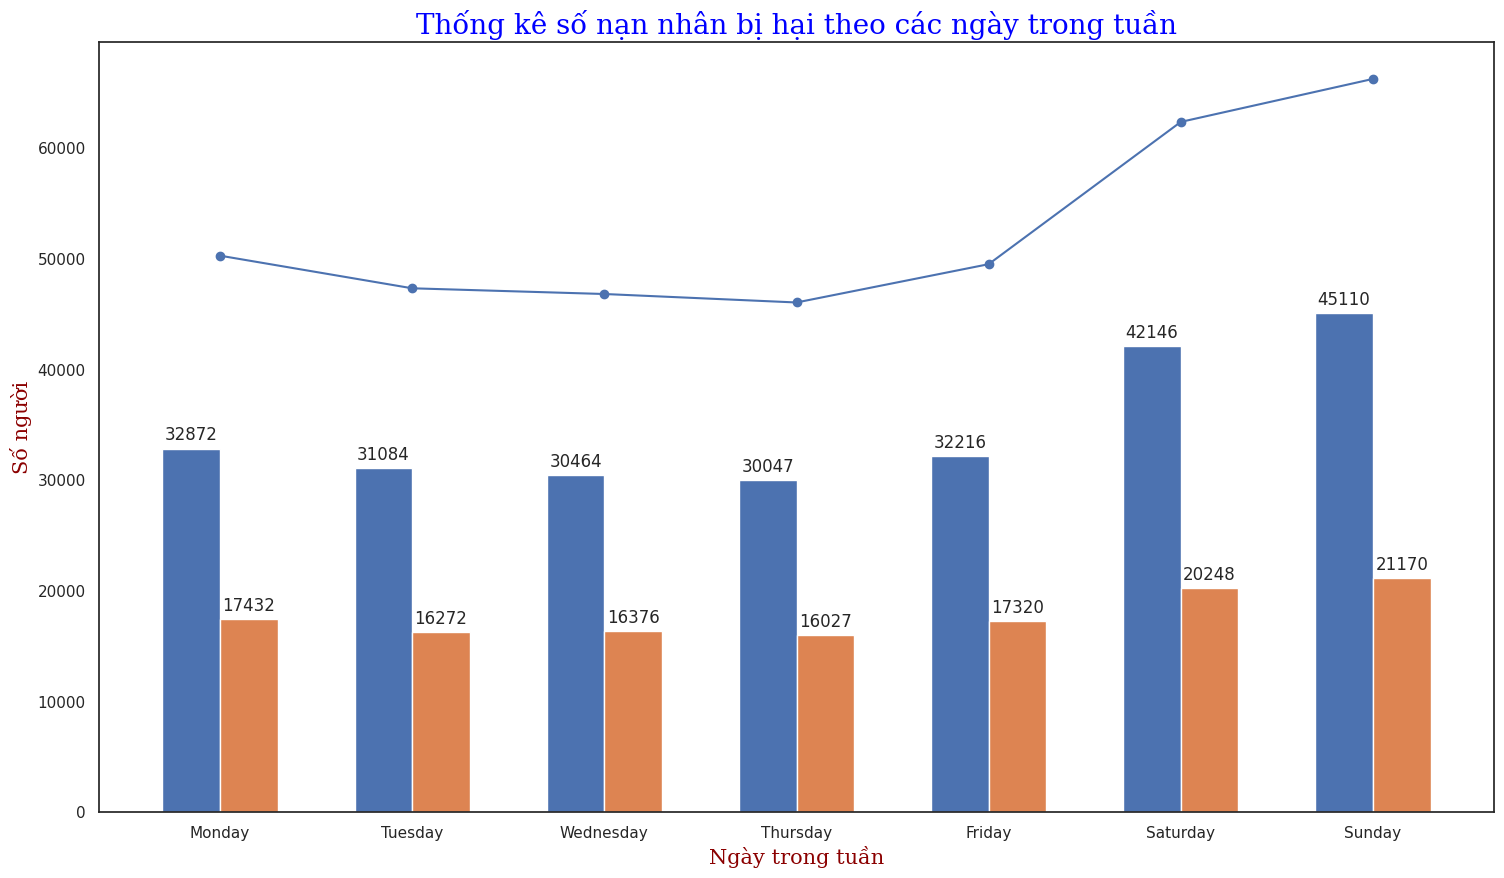

In [ ]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
kill_d = df.groupby(['Day_Of_Week']).sum()["Killed"].reindex(cats)
injured_d = df.groupby(['Day_Of_Week']).sum()["Injured"].reindex(cats)
total_d = df.groupby(['Day_Of_Week']).sum()["Total"].reindex(cats)
labels_d = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_d = np.arange(1,8)
width = 0.3
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(18)

rects1 = ax.bar(x_d - width/2, injured_d, width, label = 'Injured')
rects2 = ax.bar(x_d + width/2, kill_d, width, label = 'Killed')
rects3 = ax.plot(x_d, total_d, marker = "o", label = 'Total')

ax.set_ylabel('Số người', fontdict = font2)
ax.set_xlabel('Ngày trong tuần', fontdict = font2)
ax.set_title('Thống kê số nạn nhân bị hại theo các ngày trong tuần', fontdict = font1)

ax.set_xticks(x_d)
ax.set_xticklabels(labels_d)

ax.bar_label(rects1, padding = 3)
ax.bar_label(rects2, padding = 3)

fig.savefig("day_of_week_people.png")

plt.show()

#### ` Nhận xét: `

- Điểm chung: Số người bị thương luôn nhiều hơn (gần như gấp đôi) so với số người chết. Điều này lý giải được vì sao `Injured` có hệ số tương quan tuyến tính lớn hơn `Killed` khi đối chiếu với `Total`.

- `Theo năm`:
   
   - Thiệt hại về người có xu hướng tăng dần theo năm.

   - Từ năm 2017-2018 có xu hướng giảm nhưng sau đó 1 năm đã tăng lại. Từ năm 2014-2016 và từ năm 2019-2020 có xu hương tăng mạnh rất nhiều.

- `Theo quý`:

   - Thiệt hại về người có xu hướng tăng dần theo quý.
   
   - Số lượng các nạn nhân bị hại do các vụ nổ súng gây ra theo các quý thì dường như với quý 1 và quý 4 thường có số lượng nạn nhân bị hại thấp hơn quý 2 và quý 3. Quý 1 là thấp nhất

- `Theo tháng`:

   - Đồ thị phân phối đối xứng. Có xu hướng chạm đỉnh ở các tháng giữa năm (5, 6, 7, 8).

   - Tháng 2 có ít người bị hại nhất do các vụ nổ súng diễn ra có thể bởi vì ít ngày nhất trong các tháng của năm.

   - Biểu đồ này còn thể hiện rõ các tháng ở quý 1 và quý 4 ít nạn nhân bị hại so với các tháng còn lại.
   
   - Các nạn nhân bị hại nhiều từ tháng 5 đến tháng 8. Đặc biệt bị hại nhiều nhất ở tháng 7 và tháng 8.

- `Theo tuần `:

   - Số lượng nạn nhân bị ảnh hưởng nhiều trong các ngày cuối tuần (thứ 7 và chủ nhật)
   
   - Các ngày còn lại cũng bị ảnh hưởng nhưng không chênh lệch nhau quá nhiều và không nhiều bằng 2 ngày cuối tuần.

<h2 style='color:#6ac61f'> Câu hỏi 3: Số vụ xảy ra nổ súng của các bang như thế nào? </h2>

- Tên tiểu bang tương ứng với State_Code

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
inv_us_state_to_abbrev = {v: k for k, v in us_state_to_abbrev.items()}
df["State_Name"] = df["State_Code"].map(inv_us_state_to_abbrev)

### **- Thống kê số vụ nổ súng theo các tiểu bang ở Mỹ:**

In [ ]:
data = df.groupby(['State_Code','State_Name']).size()
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Incident_Count'})

In [ ]:
fig = px.choropleth(data,
                    locations='State_Code',
                    hover_name='State_Name',
                    color='Incident_Count',
                    locationmode='USA-states',
                    scope='usa')
fig.update_layout(
    title={'text':'Number of gun violence incidents by state',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()


### **- Thống kê trung bình số người bị thương trong mỗi vụ nổ súng:**

In [ ]:
data = df.groupby(['State_Code','State_Name'])['Injured'].mean()
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Incident_Count'})

In [ ]:
fig = px.choropleth(data,
                    locations = 'State_Code',
                    hover_name = 'State_Name',
                    color = 'Injured',
                    locationmode = 'USA-states',
                    scope = 'usa')

fig.update_layout(
    title={'text':'Trung bình số người bị thương trong mỗi vụ nổ súng',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

### **- Thống kê trung bình số người chết trong mỗi vụ nổ súng:**

In [ ]:
data = df.groupby(['State_Code','State_Name'])['Killed'].mean()
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Incident_Count'})

In [ ]:
fig = px.choropleth(data,
                    locations = 'State_Code',
                    hover_name = 'State_Name',
                    color = 'Killed',
                    locationmode = 'USA-states',
                    scope = 'usa')

fig.update_layout(
    title={'text':'Trung bình số người chết trong mỗi vụ nổ súng',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

### **- Tháng xảy ra nổ súng nhiều nhất trên mỗi tiểu bang:**

In [ ]:
data = df.groupby(['State_Code', 'Month']).size()
data = data.groupby(['State_Code']).idxmax()
idx, values = zip(*data)
data = pd.DataFrame(data = values, index = idx)
data = data.reset_index()
data = data.rename(columns={'index': 'State_Code', 0: 'Most Freq Month'})

In [ ]:
inv_us_state_to_abbrev = {v: k for k, v in us_state_to_abbrev.items()}
data["State_Name"] = data["State_Code"].map(inv_us_state_to_abbrev)

In [ ]:
fig = px.choropleth(data,
                    locations = 'State_Code',
                    hover_name = 'State_Name',
                    color = 'Most Freq Month',
                    locationmode = 'USA-states',
                    scope = 'usa')
fig.show()

<h2 style='color:#6ac61f'> Câu hỏi 4: Xử lý các outliers như thế nào? </h2>

- Ở mục 3 của phần II, chúng ta đã xác định được các outliers của cột `Total`. Bây giờ ta sẽ tiến hành xử lý các outliers này.

#### **Xử lý các outlier (Trimming method)**

- Xác định giới hạn trên và dưới.

In [ ]:
norm_upper_limit = df.Total.mean() + 3 * df.Total.std()
norm_lower_limit = df.Total.mean() - 3 * df.Total.std()

- Loại bỏ các outliers đi và chúng ta chỉ có phân phối theo 3 độ lệch chuẩn

In [ ]:
df_normal_new = df[(df.Total > norm_lower_limit) & ( df.Total < norm_upper_limit)]

- Kích thước tập dữ liệu trước và sau khi xóa các outliers.

In [ ]:
print("Before Triming Size:", df.shape[0])
print("After Triming Size:", df_normal_new.shape[0])

Before Triming Size: 418693
After Triming Size: 417076


- Trực quan hóa:

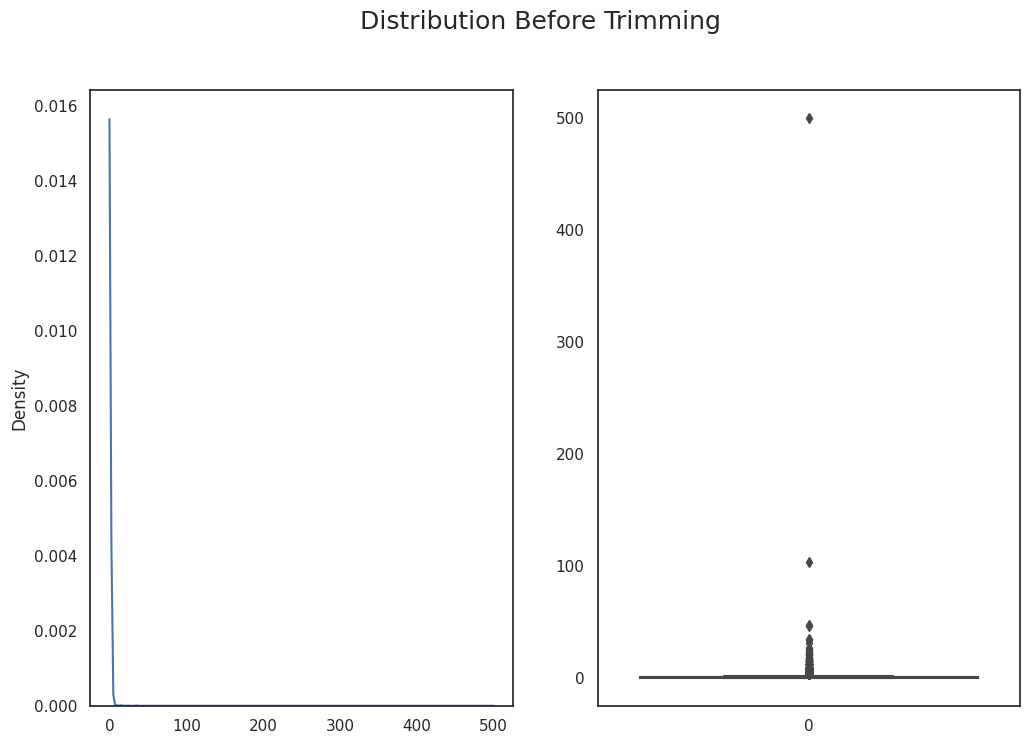

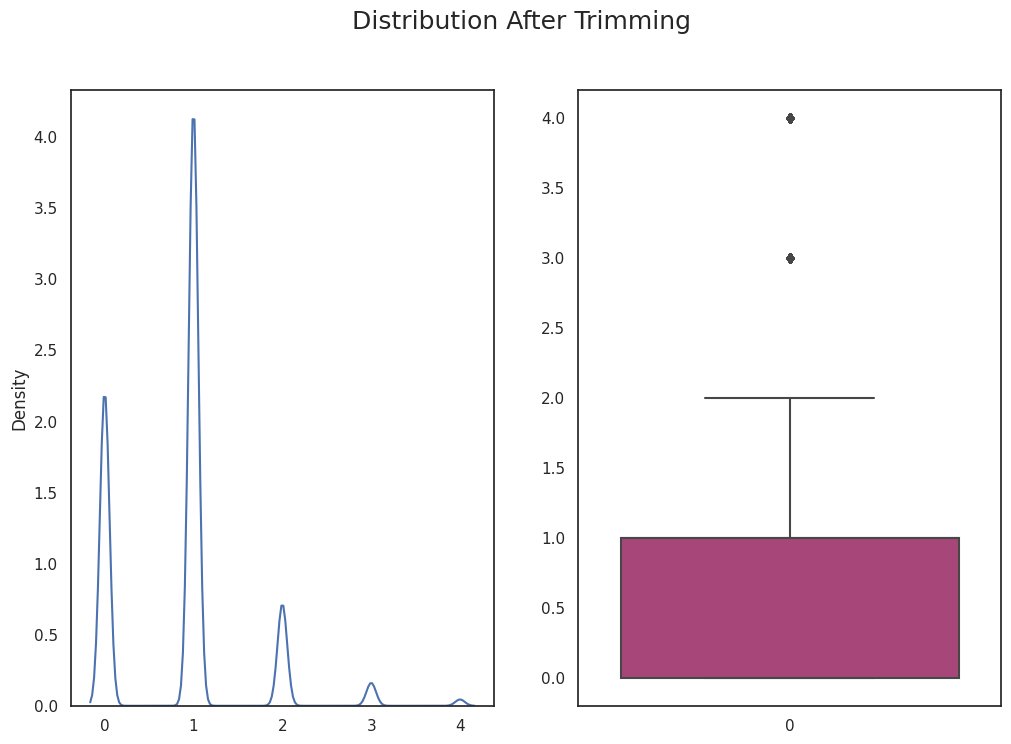

In [ ]:
# Before Trimming
plt.figure(figsize = (12, 8))
plt.suptitle("Distribution Before Trimming", fontsize = 18)
plt.subplot(1, 2, 1)
sns.kdeplot(data = df['Total'].values)
plt.subplot(1, 2, 2)
sns.boxplot(data = df['Total'].values, palette = "magma")

# After Trimming
plt.figure(figsize = (12, 8))
plt.suptitle("Distribution After Trimming", fontsize = 18)
plt.subplot(1, 2, 1)
sns.kdeplot(data = df_normal_new['Total'].values)
plt.subplot(1, 2, 2)
sns.boxplot(data = df_normal_new['Total'].values, palette = "magma")
plt.show()

## IV. Mô hình hóa dữ liệu
## 1. Rút trích và đánh giá đặc trưng
## 1.1. Rút trích đặc trưng
- Xóa `Incident_ID` ra khỏi dataframe.

In [ ]:
df.reset_index(drop = True)

,Incident_Date,State_Code,City_Or_County,Address,Killed,Injured,Total,Year,Quarter,Month,Day_Of_Week,State_Name
0,2014-01-01,KY,Lexington,Sixth St and Elm Tree Ln,0,1,1,2014,1,1,Wednesday,Kentucky
1,2014-01-01,KY,Cynthiana,US 62,0,1,1,2014,1,1,Wednesday,Kentucky
2,2014-01-01,KY,Louisville,S 38th St and W Broadway,0,1,1,2014,1,1,Wednesday,Kentucky
3,2014-01-01,OK,Lawton,NW Sheridan Rd and NW Pollard Ave,0,0,0,2014,1,1,Wednesday,Oklahoma
4,2014-01-01,OK,Okmulgee,19700 block of Sharp Rd,0,2,2,2014,1,1,Wednesday,Oklahoma
...,...,...,...,...,...,...,...,...,...,...,...,...
418688,2020-01-30,TN,Memphis,Overton Crossing St and Durham Ave,1,0,1,2020,1,1,Thursday,Tennessee
418689,2021-10-10,CO,Arvada,6925 W 84th Way,0,1,1,2021,4,10,Sunday,Colorado
418690,2019-08-05,AZ,Heber,NaN,1,0,1,2019,3,8,Monday,Arizona
418691,2020-09-09,IL,Waukegan,NaN,1,0,1,2020,3,9,Wednesday,Illinois


- Thiệt hại về người từ các vụ xả súng (tính theo tuần).

In [ ]:
#total_by_week = df[df['State_Name'] == STATE].resample('W', on = 'Incident_Date').sum()
total_by_week = df[['Incident_Date', 'Total']].resample('W', on = 'Incident_Date').sum()

total_by_week.reset_index(inplace = True)

print(total_by_week[total_by_week['Total'] == 0])
total_by_week

    Incident_Date  Total
327    2020-04-12      0


,Incident_Date,Total
0,2014-01-05,529
1,2014-01-12,555
2,2014-01-19,672
3,2014-01-26,616
4,2014-02-02,574
...,...,...
413,2021-12-05,1078
414,2021-12-12,1026
415,2021-12-19,1039
416,2021-12-26,1047


- Xóa dòng cuối vì dữ liệu bị lấn sang năm 2022 và xóa dòng có giá trị là 0.

<Axes: xlabel='Incident_Date', ylabel='Count'>

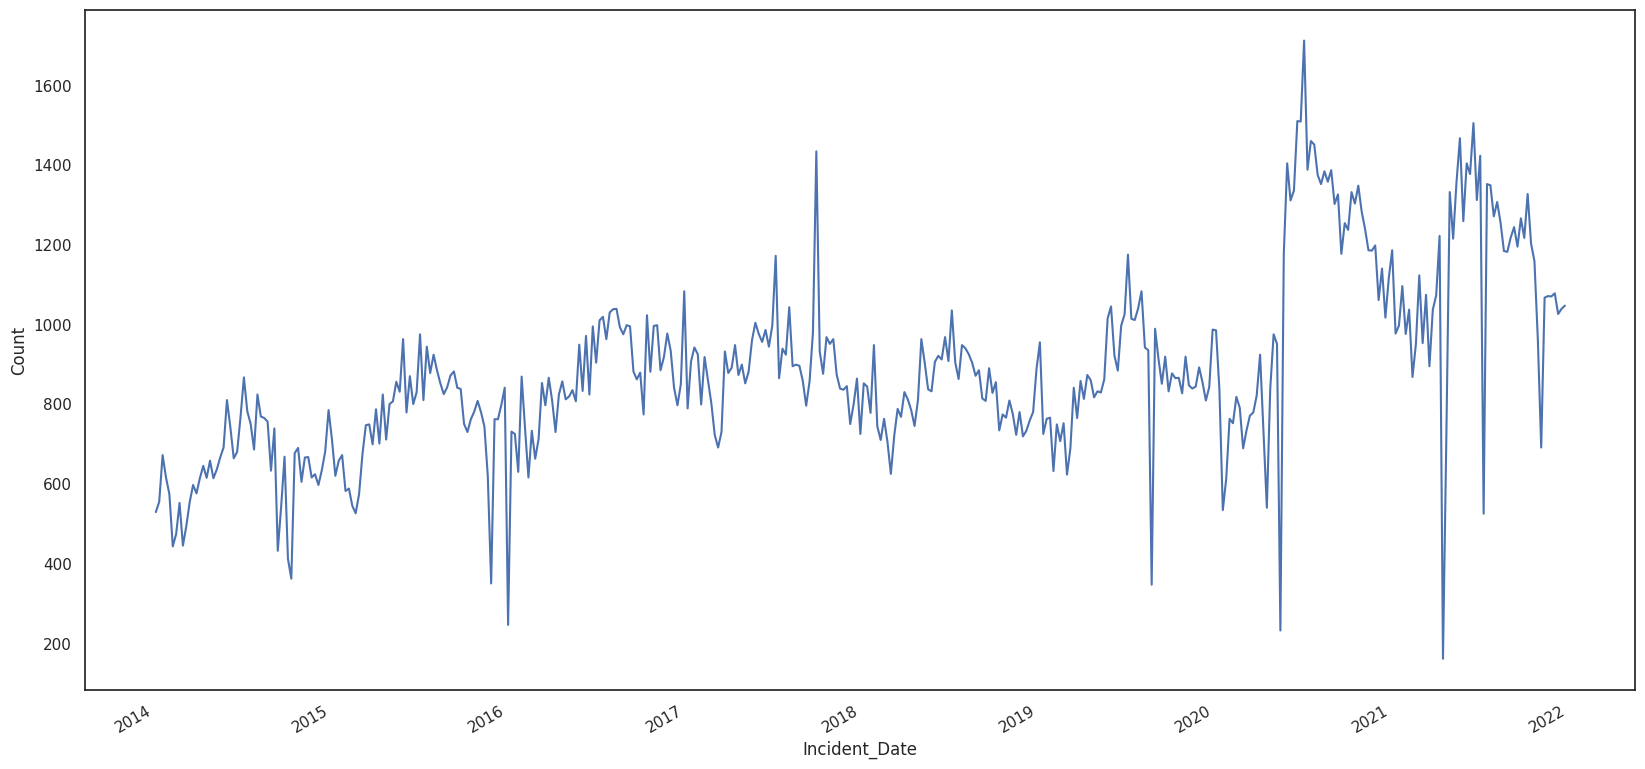

In [ ]:
# Drop last
total_by_week = total_by_week[:-1]

# Drop 0
total_by_week.drop(index = total_by_week[total_by_week['Total'] == 0].index, inplace = True)

total_by_week.groupby('Incident_Date')['Total'].sum().plot(ylabel = "Count", figsize = (20, 10))

##### - Trong tuần 5/7/2020 là có thiệt hại lớn về người: 509 chết, 1203 bị thương nâng tổng thiệt hại về người lên tới con số 1712

In [ ]:
total_by_week.iloc[total_by_week['Total'].idxmax()]

Incident_Date    2020-07-12 00:00:00
Total                           1388
Name: 340, dtype: object

## Câu hỏi: Tại sao lại không dự đoán các vụ xả súng theo ngày, theo tháng, theo năm mà lại dự đoán theo tuần?

- Với `tháng` và `năm` thì số điểm dữ liệu sẽ rất ít. Đường dự đoán không thấy quá nhiều biến động nên khi quan sát sẽ dễ bỏ lỡ rất nhiều dữ liệu quan trọng.

- Còn nếu tính theo `ngày` thì đường dự đoán sẽ biến động rất nhiều dẫn đến khó quan sát, và sẽ có rất nhiều điểm dữ liệu ngoại lai.

=> Vậy nên nhóm chọn gom gọn lại theo tuần.

## 1.2. Kiểm tra Time Series có đứng im (stationary) hay không
##### - Trước khi áp dụng bất kỳ mô hình thống kê nào trên time series, chuỗi này phải đứng im, có nghĩa là, trong các khoảng thời gian khác nhau:
  - Nó phải có giá trị trung bình không đổi.

  - Nó phải có phương sai hoặc độ lệch chuẩn không đổi.

  - Hiệp phương sai không nên phụ thuộc vào thời gian.

##### - Xu hướng (Trend) và Tính thời vụ (Seasonality) là hai lý do khiến Chuỗi thời gian không cố định và do đó cần phải được điều chỉnh.


### 1.2.1. Thống kê cuộn (Rolling Statitics)
##### - Là một kỹ thuật trực quan dùng để vẽ đường trung bình hoặc độ lệch chuẩn động để xem liệu nó có thay đổi theo thời gian hay không.

In [ ]:
# Calcute rolling statistics
rolmean = total_by_week.rolling(window = 52).mean()   # One year contains 52 weeks
rolstd = total_by_week.rolling(window = 52).std()
print("Mean: \n", rolmean)
print("\n")
print("Std: \n", rolstd)

Mean: 
            Total
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
..           ...
412  1124.000000
413  1124.326923
414  1122.134615
415  1122.557692
416  1121.230769

[416 rows x 1 columns]


Std: 
           Total
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
..          ...
412  238.475386
413  238.398967
414  238.775884
415  238.605377
416  238.834311

[416 rows x 1 columns]


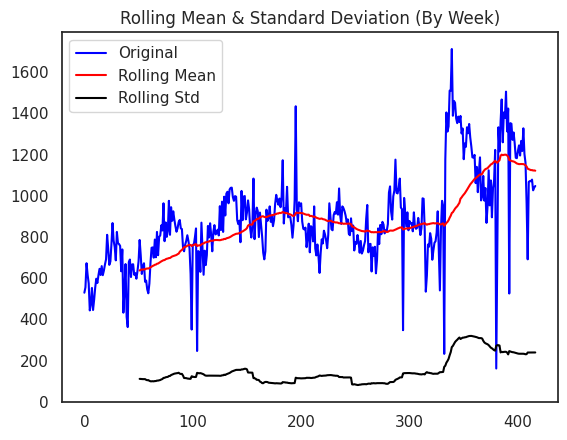

In [ ]:
# Plot rolling statistics
plt.plot(total_by_week['Total'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (By Week)')
plt.show(block=False)

### Nhận xét: Để chuỗi thời gian là chuỗi dừng, chúng ta cần đảm bảo rằng cả hai số liệu thống kê luân phiên là `mean` và `std` **giữ nguyên thời gian bất biến hoặc không đổi theo thời gian**. Do đó, các đường cong của cả hai phải song song với trục x, mà trong trường hợp của chúng ta thì không phải như vậy.
  - Thời gian bất biến: Nếu độ trễ thời gian trên đầu vào tương đương trực tiếp với độ trễ thời gian của chức năng đầu ra.

### 1.2.2. Kiểm định ADF (Augmented Dickey–Fuller)
##### - Được sử dụng để cung cấp các giá trị khác nhau nhằm giúp xác định chuỗi dừng.
  - `p-value`(0 <= p <= 1) phải càng thấp càng tốt

  - Các `giá trị tới hạn (critical values)` ở các khoảng tin cậy khác nhau phải gần với `giá trị thống kê kiểm nghiệm (test statitics value)`.

In [ ]:
from statsmodels.tsa.stattools import adfuller

print('Augmented Dickey-Fuller Test:')
df_ABDF_test = adfuller(total_by_week['Total'], autolag='AIC')

res = pd.Series(df_ABDF_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_ABDF_test[4].items():
    res['Critical Value (%s)'%key] = value

print(res)

Augmented Dickey-Fuller Test:
Test Statistic                  -2.930585
p-value                          0.041905
#Lags Used                      12.000000
Number of Observations Used    403.000000
Critical Value (1%)             -3.446681
Critical Value (5%)             -2.868739
Critical Value (10%)            -2.570605
dtype: float64


## Nhận xét: Thỏa điều kiện của chuỗi dừng. Nên không cần xét tới `1.2.3`.

### 1.2.3. Tái cơ cấu dữ liệu và tái kiểm định
#### - Biến đổi Log Scale.

<Axes: xlabel='Incident_Date', ylabel='Total'>

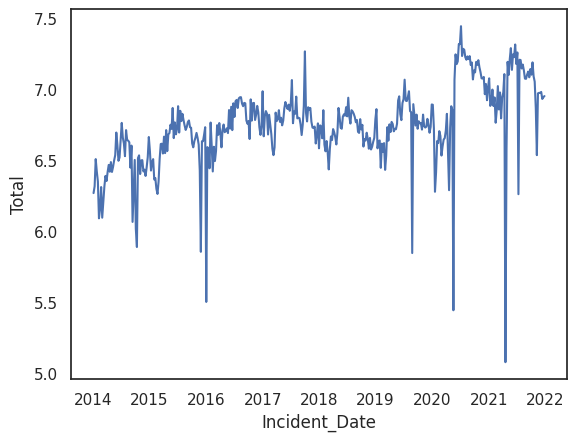

In [ ]:
logScale = pd.DataFrame()

logScale['Total'] = np.log(total_by_week['Total'])
logScale['Incident_Date'] = total_by_week['Incident_Date']

sns.lineplot(x = "Incident_Date", y = "Total", data = logScale)

#### - Tính toán lại trung bình và độ lệch chuẩn. Ta thấy có sự thay đổi: cả 2 đường biểu diễn đã ít biến động hơn rõ rệt.

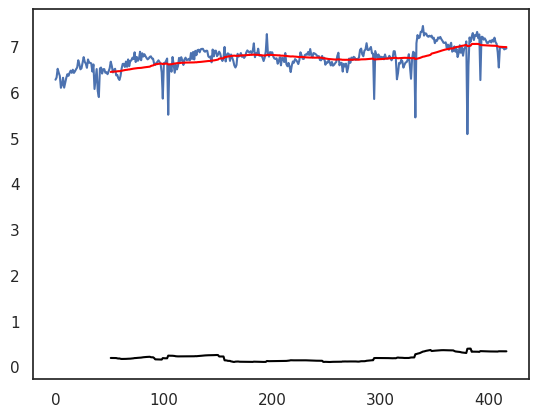

In [ ]:
movingAverage = logScale['Total'].rolling(window=52).mean()
movingSTD = logScale['Total'].rolling(window=52).std()
plt.plot(logScale['Total'])
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='black')

#### - Ở đây ta tập trung chủ yếu vào `mean`. Vì đường biểu diễn của `mean` không có dạng xu hướng (trend component) nên ta áp dụng thẳng công thức (4) để tính toán tập dữ liệu mới.

###(1)
$$
logscaleL=stationarypart(L1)+trend(LT)
$$

###(2)
$$
movingavgoflogscaleA=stationarypart(A1)+trend(AT)
$$

###(3)
$$
resultseriesR=L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT)
$$

###(4)
$$
R=L1−A1
$$

In [ ]:
datasetLogScaleMinusMovingAverage = pd.DataFrame()
datasetLogScaleMinusMovingAverage['Incident_Date'] = logScale['Incident_Date']
datasetLogScaleMinusMovingAverage['Total'] = logScale['Total'] - movingAverage

# Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Incident_Date,Total
51,2014-12-28,0.225420
52,2015-01-04,0.120722
53,2015-01-11,-0.018360
54,2015-01-18,0.041530
55,2015-01-25,0.060910
...,...,...
412,2021-11-28,-0.011377
413,2021-12-05,-0.004234
414,2021-12-12,-0.051648
415,2021-12-19,-0.039468


In [ ]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=52).mean()
    movingSTD = timeseries.rolling(window=52).std()

    #Plot rolling statistics
    origin = plt.plot(timeseries['Total'], color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    df_ABDF_test = adfuller(timeseries['Total'], autolag='AIC')
    res = pd.Series(df_ABDF_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_ABDF_test[4].items():
        res['Critical Value (%s)'%key] = value
    print(res)

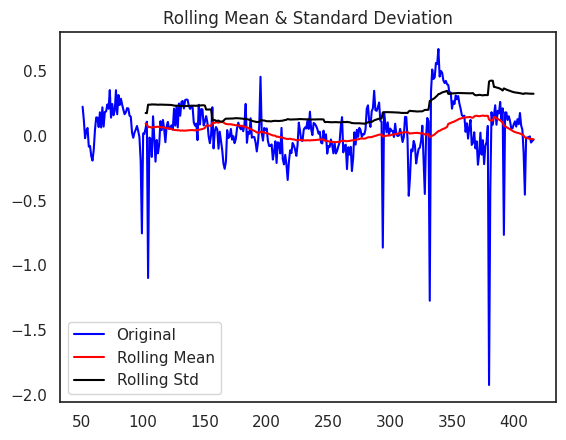

Results of Dickey Fuller Test:
Test Statistic                  -4.231798
p-value                          0.000582
#Lags Used                       5.000000
Number of Observations Used    359.000000
Critical Value (1%)             -3.448697
Critical Value (5%)             -2.869625
Critical Value (10%)            -2.571077
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

### Nhận xét: Sau quá khi scale lại dữ liệu theo logarit thì đường `mean` đã ít biến động hơn rõ rệt và không còn bị ngắt quãng nữa. `p-value` của chúng ta cũng đã giảm đi rất nhiều.



# Câu hỏi đặt ra: Tại sao TS phải là chuỗi dừng?
### - Nếu một TS có một hành vi cụ thể trong một khoảng thời gian, thì có khả năng cao là trong một khoảng thời gian khác, nó cũng sẽ có hành vi tương tự. Điều này giúp cải thiện độ chính xác của dự báo.

### - Lý thuyết và Công thức toán học sẽ dễ áp dụng thuần thục hơn vì TS là chuỗi dừng.

## 2. Prophet
### 2.1. Xây dựng mô hình với Prophet


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

##### - **Prophet** có thể hiểu như một mô hình API của sklearn. Bên cạnh đó, nó cũng hỗ trợ cho tính năng `fit` và `predict` model.
##### - Tham số đầu vào của **Prophet** luôn là một dataframe với 2 cột: `ds (datestamp)` và `y` là thuộc tính đại diện dạng numeric mà chúng ta muốn dự báo.

In [ ]:
temp = total_by_week[['Incident_Date', 'Total']]
temp.rename(columns={'Total': 'y', 'Incident_Date': 'ds'}, inplace=True)
model_prophet = Prophet(seasonality_mode='multiplicative')
model_prophet.fit(temp)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vmedmzm/sk01d_na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vmedmzm/pekyo0l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86015', 'data', 'file=/tmp/tmp7vmedmzm/sk01d_na.json', 'init=/tmp/tmp7vmedmzm/pekyo0l4.json', 'output', 'file=/tmp/tmp7vmedmzm/prophet_modelrr2vvkuv/prophet_model-20230525133747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:37:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##### - Đưa ra dự báo về các con số trong tương lai. Cụ thể là trong 210 tuần tiếp theo

- `ds` là ngày diễn ra

- `yhat` là con số ước tính

- `yhat_lower` và `yhat_upper` là khoảng dự đoán.

In [ ]:
future = model_prophet.make_future_dataframe(periods=210, freq='W')
forecast = model_prophet.predict(future)
print(forecast.columns)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']]

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')


,ds,trend,yhat,yhat_lower,yhat_upper
0,2014-01-05,620.000800,591.510117,414.906349,764.040817
1,2014-01-12,621.662267,577.054961,394.227011,746.152839
2,2014-01-19,623.323734,558.576461,376.121687,734.747587
3,2014-01-26,624.985202,548.455759,369.158539,729.631573
4,2014-02-02,626.646669,548.397832,365.961883,719.460978
...,...,...,...,...,...
621,2025-12-07,1675.275260,1539.883375,1334.482752,1734.788946
622,2025-12-14,1677.557961,1545.760327,1340.698735,1742.726078
623,2025-12-21,1679.840662,1575.144149,1376.757100,1780.786375
624,2025-12-28,1682.123363,1607.336319,1387.882903,1804.989520


### 2.2. Trực quan hóa
##### - Đồ thị `trend` và `seasonality`

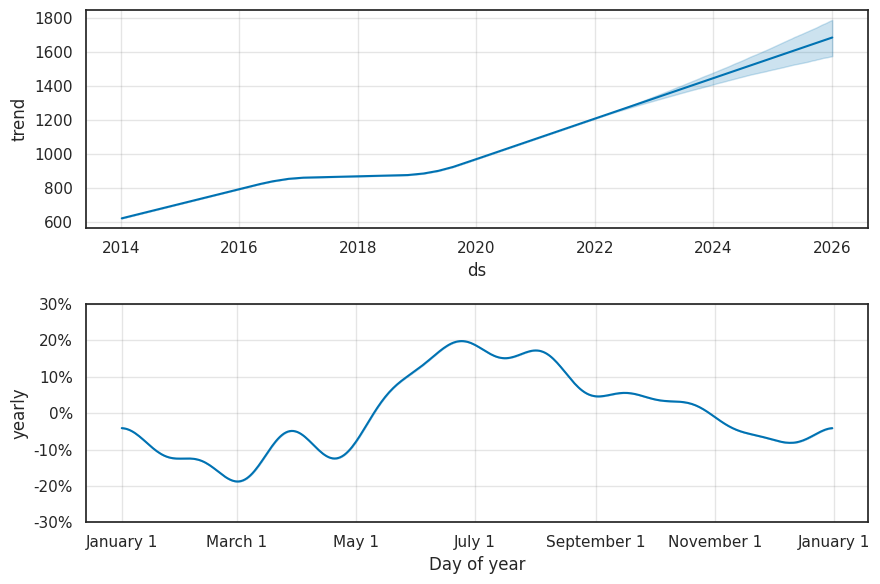

In [ ]:
fig = model_prophet.plot_components(forecast)

## Nhận xét: Cả hai đồ thị phù hợp với dữ liệu nhưng không bị overfitting
- `trend`: Số lượng thiệt hại tăng dần qua các năm
- `Seasonality`: Số lượng thiệt hai ít ở các tháng đầu năm và nhiều ở tháng 6 , 7, 8.

##### - Đồ thị `forecast` theo năm (các điểm dữ liệu là số liệu các tuần)

In [ ]:
plot_plotly(model_prophet, forecast)

## Nhận xét:

- Nhìn chung thì hầu hết các điểm thực tế (màu đen) bám sát với đường dự đoán (màu xanh) và nằm trong khoảng dao động.

- Đường đự đoán biến động tịnh tiến theo quỹ đạo giống nhau (zic zac), không thay đổi theo chu kỳ mỗi năm.

- Tuy nhiên, đường dự đoán vẫn bỏ sót một vài điểm ngoại lai. Những điểm này vượt khỏi khoảng dự đoán của chúng ta (quá nhiều hoặc quá ít), ta có thể bỏ qua vì nó không ảnh hưởng nhiều đến mô hình dự đoán kết quả

# Câu hỏi: Tại sao lại không giảm chiều dữ liệu?

###- Vì mô hình chỉ nạp vào 2 thuộc tính (`ds` và `y`) nên kết quả dự đoán đầu ra chỉ là mảng một chiều chứ không phải là ma trận

### => Giảm chiều dữ liệu là không cần thiết.

### 2.3. Cross Validation


In [ ]:
from prophet.diagnostics import cross_validation

##### - Prophet cung cấp tính năng `cross validation` cho `time series` để đo lỗi dự báo bằng dữ liệu trước đó.

##### - Điều này được thực hiện bằng cách chọn các điểm cắt (cutoff points) trước đó và đối với mỗi điểm trong số chúng, mô hình chỉ sử dụng dữ liệu cho đến điểm cắt đó.

### => Có thể so sánh các giá trị dự báo với các giá trị thực tế.


### 2.3.1. Ước lượng tham số đầu vào

- `initial: ` Số ngày bỏ qua từ ngày ban đầu, mặc định là gấp 3 lần `horizon`

- `period: ` Chu kỳ cho mỗi dự đoán

- `horizon: ` Số ngày cho dự đoán

##### -  Thực hiện xác thực chéo để đánh giá hiệu suất dự đoán trong khoảng thời gian 365 ngày. Bắt đầu với 1460 ngày đào tạo dữ liệu trong lần cắt đầu tiên và sau đó đưa ra dự đoán sau mỗi 180 ngày

In [ ]:
df_cv = cross_validation(model_prophet, initial = '1460 days', period = '180 days', horizon = '365 days', parallel='processes')
df_cv

INFO:prophet:Making 7 forecasts with cutoffs between 2018-01-11 00:00:00 and 2020-12-26 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f09cf466980>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vmedmzm/h85ggcdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vmedmzm/f8t27n2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vmedmzm/i9c5xzbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16118', 'data', 'file=/tmp/tmp7vmedmzm/h85ggcdj.json', 'init=/tmp/tmp7vmedmzm/i9c5xzbn.json', 'output', 'file=/tmp/tmp7vmedmzm/prophet_modelkl4h9e55/prophet_model-20230525133753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:37:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vmedmzm/074drixq.json
DEB

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-14,862.765155,740.446801,973.445780,844,2018-01-11
1,2018-01-21,891.750944,770.902205,1015.106290,778,2018-01-11
2,2018-01-28,897.732333,778.264564,1012.598915,948,2018-01-11
3,2018-02-04,869.234962,745.679250,981.149440,744,2018-01-11
4,2018-02-11,819.815656,697.968600,937.829613,710,2018-01-11
...,...,...,...,...,...,...
358,2021-11-28,1326.449071,1182.703920,1472.168736,1070,2020-12-26
359,2021-12-05,1315.875463,1168.437151,1458.437796,1078,2020-12-26
360,2021-12-12,1320.831534,1182.296580,1464.760095,1026,2020-12-26
361,2021-12-19,1348.755657,1201.160128,1498.879664,1039,2020-12-26


In [ ]:
df_cv['cutoff'].value_counts().sort_index()

2018-01-11    52
2018-07-10    52
2019-01-06    52
2019-07-05    51
2020-01-01    51
2020-06-29    52
2020-12-26    53
Name: cutoff, dtype: int64

### 2.3.2. Đánh giá mô hình
- `Mean Absolute Error (MAE)`: Trung bình trị tuyệt đối sai số. Chính là khoảng cách theo norm chuẩn bậc 1 giữa giá trị dự báo và giá trị thực tế.
$$
{\displaystyle \operatorname {MAE} ={\frac {1}{n}}\sum _{i=1}^{n}|\ Y_{i}-{\hat {Y_{i}}}|}
$$


- `Mean Squared Error (MSE) - Sai số toàn phương trung bình: `Trung bình tổng bình phương sai số.
$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(\ Y_{i}-{\hat {Y_{i}}})^{2}}
$$


- `Root Mean Squared Error (RMSE) - Độ lệch chuẩn của các phần dư - Sai số dự đoán: `Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế.
$$
{\displaystyle \operatorname {RMSE} = \sqrt{{\frac {1}{n}}\sum _{i=1}^{n}(\ Y_{i}-{\hat {Y_{i}}})^{2}}} = \sqrt{MSE}
$$

- `Mean Absolute Percentage Error (MAPE)`: Trung bình phần trăm trị tuyệt đối sai số. Chỉ số này cho biết giá trị dự báo sai lệch bao nhiêu phần trăm so với giá trị thực tế. Lưu ý ta chỉ tính được chỉ số này chỉ khi giá trị thực tế đều khác 0.
$$
{\displaystyle \operatorname {MAPE} ={\frac {1}{n}}\sum _{i=1}^{n}{\frac {Y_{actual} - {Y_{forecast}}}{Y_{actual}}}}
$$

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,36102.849219,190.007498,134.251090,0.130830,0.108846,0.133015,0.611111
1,37 days,36051.145099,189.871391,133.307048,0.130032,0.108846,0.132240,0.611111
2,38 days,34762.486197,186.447006,127.720486,0.125466,0.101997,0.127153,0.638889
3,39 days,34752.800837,186.421031,127.250887,0.124917,0.101997,0.126611,0.638889
4,40 days,33987.916239,184.358120,124.094403,0.121875,0.092614,0.123002,0.666667
...,...,...,...,...,...,...,...,...
323,361 days,93404.467399,305.621445,259.051973,0.221969,0.227423,0.245522,0.194444
324,362 days,89904.773074,299.841246,253.434949,0.217270,0.215024,0.239274,0.194444
325,363 days,90179.955390,300.299776,254.327554,0.217204,0.215024,0.239198,0.194444
326,364 days,86507.216290,294.121091,249.198738,0.216170,0.215024,0.237786,0.194444


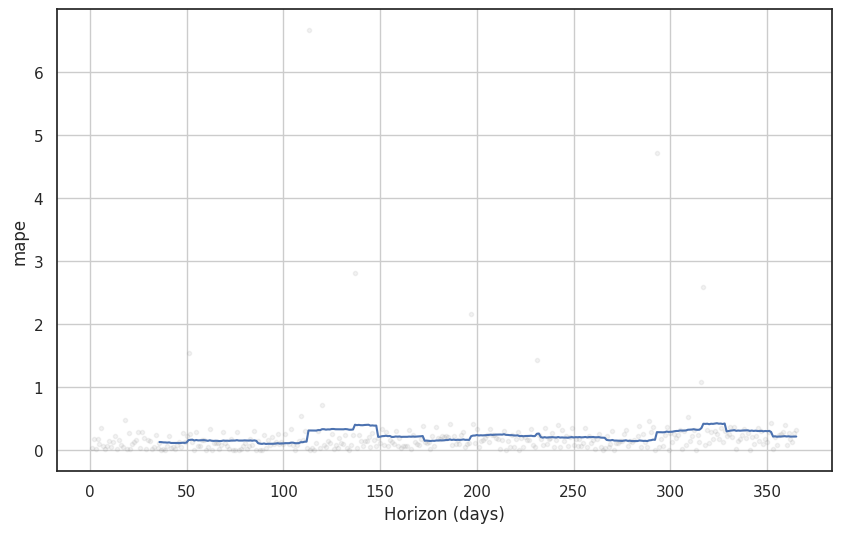

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig1 = plot_cross_validation_metric(df_cv, metric='mape', rolling_window = 0.1)

In [ ]:
print(f"{df_p['mape'].mean() * 100 : 0.2f}")

print(f"{df_p['mape'].max() * 100 : 0.2f}")

 22.63
 42.96


## Nhận xét:
- Nhìn chung thì đồ thị SAPE có xu hướng tăng dần theo ngày dự đoán.

- MAPE càng thấp thì chứng tỏ giá trị dự báo và thực tế không chênh lệch nhiều.

## 2. ARIMA
##### - Chúng ta biết rằng hầu hết các chuỗi thời gian đều có sự tương quan giữa giá trị trong quá khứ đến giá trị hiện tại. Mức độ tương quan càng lớn khi chuỗi càng gần thời điểm hiện tại. Chính vì thể mô hình ARIMA sẽ tìm cách đưa vào các biến trễ nhằm tạo ra một mô hình dự báo fitting tốt hơn giá trị của chuỗi

##### - Dựa trên thuộc tính của mô hình ARIMA để tạo ra một loạt các dự đoán và dự báo từ một mô hình được đào tạo duy nhất, người ta có thể sử dụng nó rộng rãi để dự đoán thời tiết trong bảy ngày tới hoặc hiệu suất chứng khoán trong vài ngày tới. Người ta cũng có thể xác định những biến động trong doanh số bán hàng hoặc xác định số lượng khách hàng mới sẽ được giới thiệu trong năm.


### 2.1. Khởi tạo chuỗi lợi suất và khảo sát dữ liệu
##### - Để thuận tiện cho việc xây dựng mô hình ARIMA ta sẽ chuyển chuỗi sang chuỗi dừng bằng cách lấy lợi suất theo công thức sai phân bậc 1 của logarit như bên dưới:
$$
r_{t} = log(\frac {x_{t}}{x_{t-1}})
$$

In [ ]:
return_TS = np.log(total_by_week['Total'] / total_by_week['Total'].shift(1)).values[0:]

return_TS[:5]

array([        nan,  0.04797968,  0.19129023, -0.08701138, -0.07061757])

##### - Fill giá trị `nan` bằng trung bình chuỗi.

In [ ]:
return_TS[0] = np.mean(return_TS[np.isfinite(return_TS)])

return_TS[:5]

array([ 0.00164505,  0.04797968,  0.19129023, -0.08701138, -0.07061757])

##### - Fill giá trị `±inf` bằng max và min.

In [ ]:
# replace -inf woth min
return_TS[np.isneginf(return_TS)] = np.min(return_TS[np.isfinite(return_TS)])

# replace int with max
return_TS[np.isposinf(return_TS)] = np.max(return_TS[np.isfinite(return_TS)])

### a. Biểu đồ lợi suất
##### - Biểu đồ chuỗi lợi suất $r_{t}$ giúp ta hiểu hơn về xu hướng, biến động.

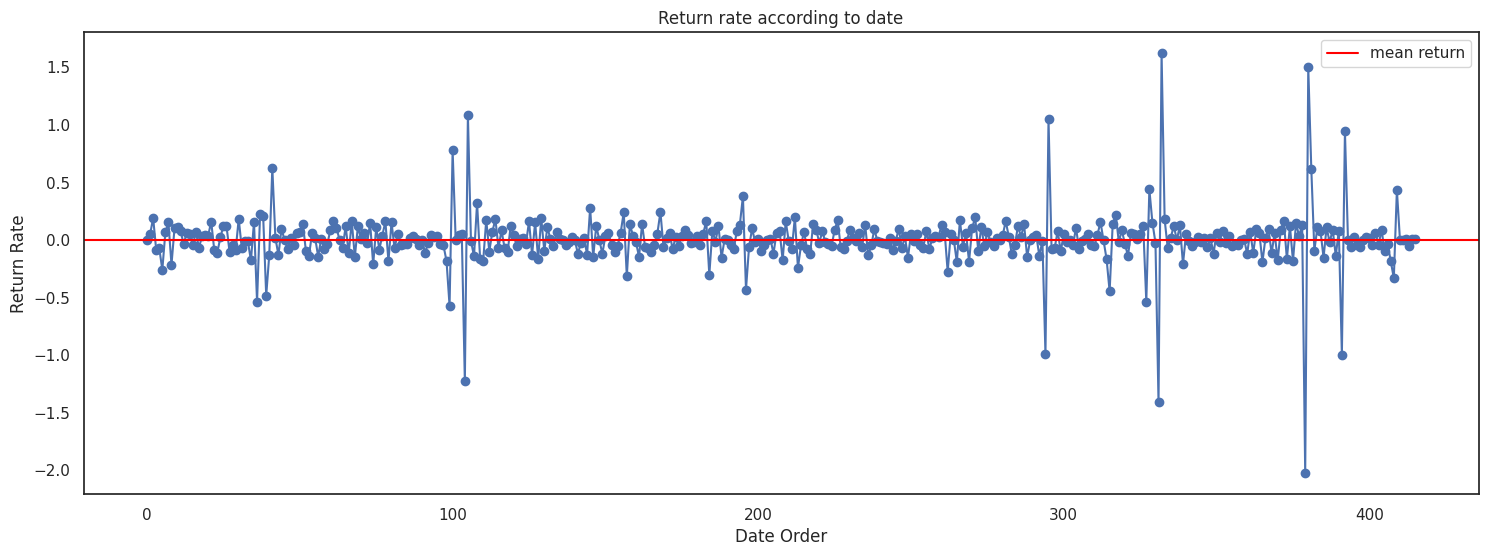

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(np.arange(return_TS.shape[0]), return_TS, '-o')
plt.axhline(y = return_TS[0], label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

## Nhận xét: Biểu đồ chuỗi lợi suất cho thấy nó là một biến động ngẫu nhiên dạng nhiễu trắng, có trung bình gần như bằng 0 và phương sai không đổi.

### b. Quan hệ tuyến tính giữa $r_{t}$ và $r_{t-1}$

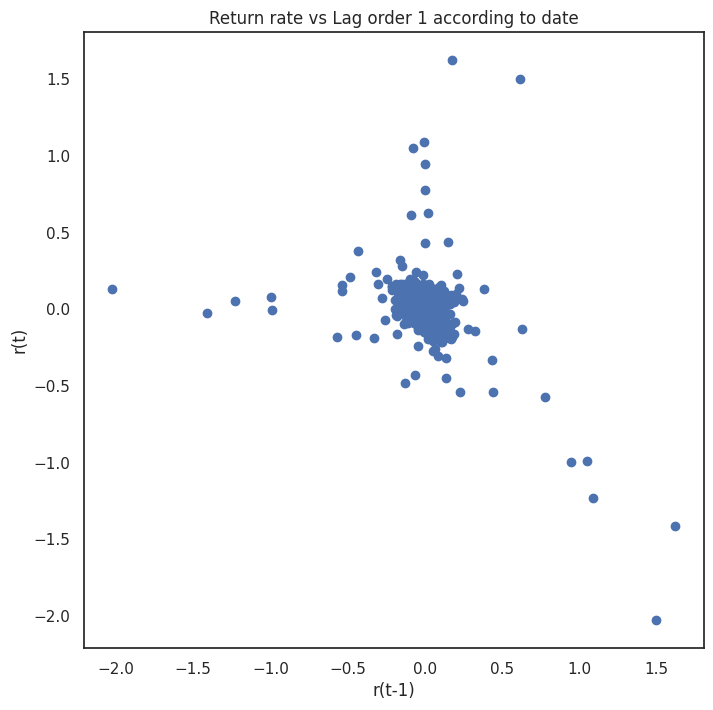

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x = return_TS[1:], y = return_TS[:-1])
plt.title('Return rate vs Lag order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

### Nhận xét: Đồ thị cho thấy $r_{t}$ và $r_{t-1}$ có mối quan hệ tương quan. Biểu đồ của chúng là một tập hợp các điểm hội tụ lại chính giữa.

### c. Kiểm tra tính dừng

In [ ]:
print('Augmented Dickey-Fuller Test:')
df_ABDF_test = adfuller(return_TS, autolag='AIC')

res = pd.Series(df_ABDF_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_ABDF_test[4].items():
    res['Critical Value (%s)'%key] = value

print(res)

Augmented Dickey-Fuller Test:
Test Statistic                -1.437269e+01
p-value                        9.436227e-27
#Lags Used                     4.000000e+00
Number of Observations Used    4.110000e+02
Critical Value (1%)           -3.446361e+00
Critical Value (5%)           -2.868598e+00
Critical Value (10%)          -2.570530e+00
dtype: float64


### Giá trị p-value < 0.05, kết luận chúng ta sẽ bác bỏ giả thuyết. Do đó chuỗi lợi suất có tính chất dừng.

### 2.2. Lựa chọn tham số ARIMA(p, d, q)
##### - Chú thích:
  - $p$ : Hệ số bậc tự do

  - $d = 0$ : Vì chuỗi là chuỗi dừng

  - $q$ : Độ trễ phù hợp lớn nhất của quá trình trung bình trượt

##### - Vẽ biểu đồ `ACF (Autocorrelation Function)` và `PACF (Partial Autocorrelation Function)` với:

  - Trục hoành là **độ trễ**,
  - Trục tung là giá trị của **hệ số tự tương quan tương ứng** với độ trễ

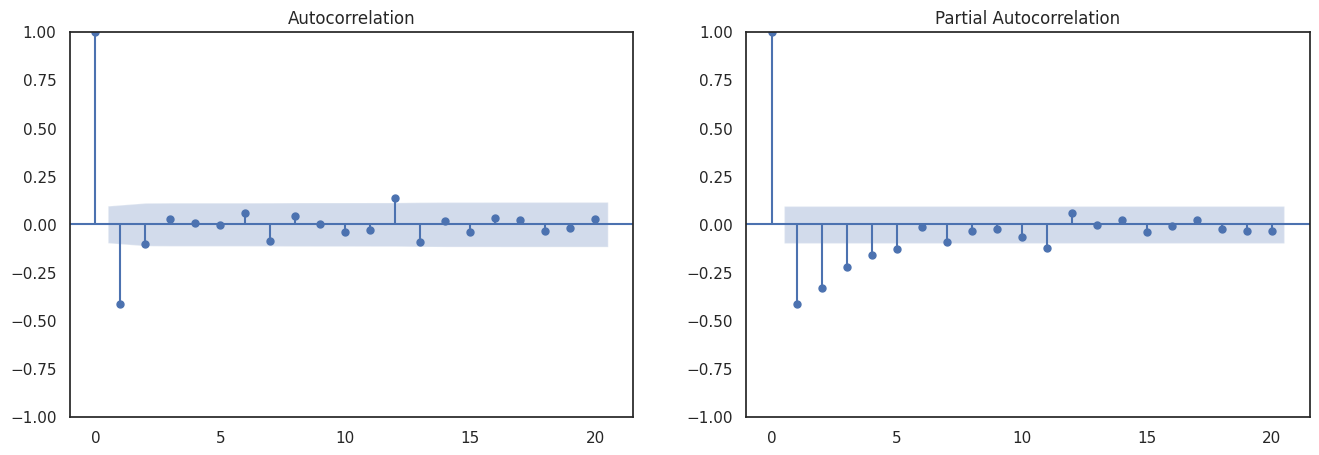

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize = (16, 5))

plot_acf(return_TS, lags = 20, title='Autocorrelation', ax = ax[0])
plot_pacf(return_TS, lags = 20, title='Partial Autocorrelation', ax = ax[1])

plt.show()

#### - Tương quan của chúng ta thể hiện rõ nhất khi 0 ≤ lag ≤ 5 nên ta có thể thu hẹp phạm vi của độ trễ (lag) xuống còn 5 để dễ quan sát hơn.

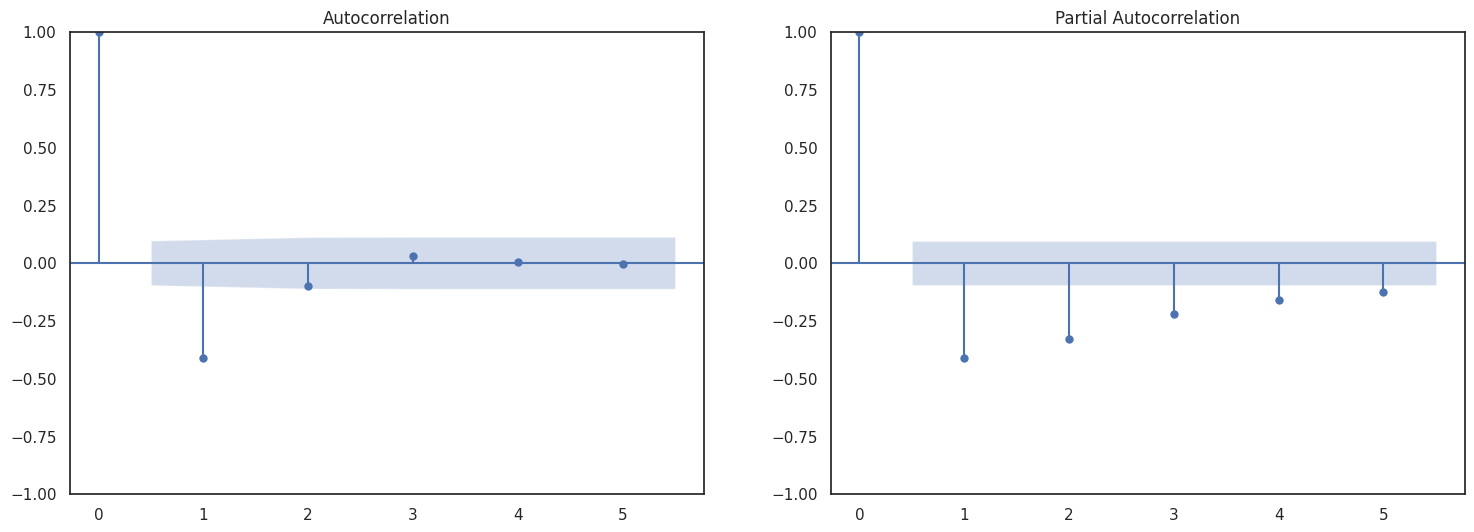

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))

plot_acf(return_TS, lags = 5, title='Autocorrelation', ax = ax[0])
plot_pacf(return_TS, lags = 5, title='Partial Autocorrelation', ax = ax[1])

plt.show()

## Nhận xét: Biểu đồ thể hiện tương quan mạnh tại lag = 1. Ta rút ra được vài kịch bản cho tham số đầu vào của mô hình ARIMA:








In [ ]:
orders = [[1, 0, 1],
          [1, 0, 0],

          [5, 0, 0],
          [0, 0, 5]]

### 2.3. Xây dựng và đánh giá mô hình
### 2.3.1. Thủ công
##### - Thử ước tính input cho mô hình dựa trên các tham số vừa tìm được.

In [ ]:
import statsmodels.api as sm

model_arima = sm.tsa.ARIMA(return_TS, order = orders[0])
model_arima_test = model_arima.fit()
print(model_arima_test.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  416
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  74.758
Date:                Thu, 25 May 2023   AIC                           -141.516
Time:                        13:38:08   BIC                           -125.393
Sample:                             0   HQIC                          -135.141
                                - 416                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.003      0.502      0.616      -0.005       0.008
ar.L1          0.1009      0.040      2.544      0.011       0.023       0.179
ma.L1         -0.7912      0.032    -24.504      0.0

## Chú thích:
- `No. Observations`: Số lượng quan sát

- `Log Likelihood`: Giá trị hàm logarit ước lượng hợp lý tối đa

- `AIC`: Chỉ số Akaike Information Criteria.

  - Là công cụ ước tính sai số dự đoán và do đó chất lượng tương đối của các mô hình thống kê cho một tập hợp dữ liệu nhất định

- `BIC`: Chỉ số Bayesian Information Criteria
  - Chỉ số này cũng có chức năng đo lường sai số của mô hình như AIC nhưng theo trường phái thống kê suy diễn (statistical inference).

#### - Ta thiết lập lại phương thức để chỉ xuất ra kết quả quan tâm (AIC) để đối chiếu với các input truyền vào.

In [ ]:
def arima_fit(orders, data):
  models = dict()
  for order in orders:
    model_arima = sm.tsa.ARIMA(data, order = order).fit()
    model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
    print('{} --> AIC = {}'.format(model_name, model_arima.aic))
    print('\n')
    models[model_name] = model_arima
  return models

models = arima_fit(orders, return_TS)

ARIMA(1,0,1) --> AIC = -141.51617652011313


ARIMA(1,0,0) --> AIC = -57.30873773467856


ARIMA(5,0,0) --> AIC = -133.59410731114414


ARIMA(0,0,5) --> AIC = -137.02904633571018




### Nhận xét: Ta nhận thấy mô hình ARIMA(1,0,1) là phù hợp nhất với bộ dữ liệu lợi suất vì nó tương ứng với chỉ số AIC là nhỏ nhất.

### 2.3.2. Tự động
- Việc lựa chọn mô hình tốt nhất chỉ đơn thuần dựa trên chỉ số AIC nên chúng ta hoàn toàn có thể tự động thực hiện qui trình này.

In [ ]:
%pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(return_TS, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=1,
                           start_P=0, seasonal=False,
                           d=0, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15.775, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-59.264, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-142.817, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-143.060, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-142.412, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-142.093, Time=0.68 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-143.413, Time=0.78 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-142.383, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-140.384, Time=1.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-141.870, Time=1.50 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 6.110 seconds
-143.41291149469913


## Nhận xét: Kết quả mô hình tốt nhất thu được là ARIMA(0, 0, 2)

### 2.4. Kiểm tra yếu tố mùa vụ

In [ ]:
total_by_month = df[['Incident_Date', 'Total']].resample('M', on = 'Incident_Date').sum()

total_by_month

,Total
Incident_Date,
2014-01-31,2748
2014-02-28,1940
2014-03-31,2475
2014-04-30,2684
2014-05-31,3067
...,...
2021-08-31,5442
2021-09-30,5211
2021-10-31,5283


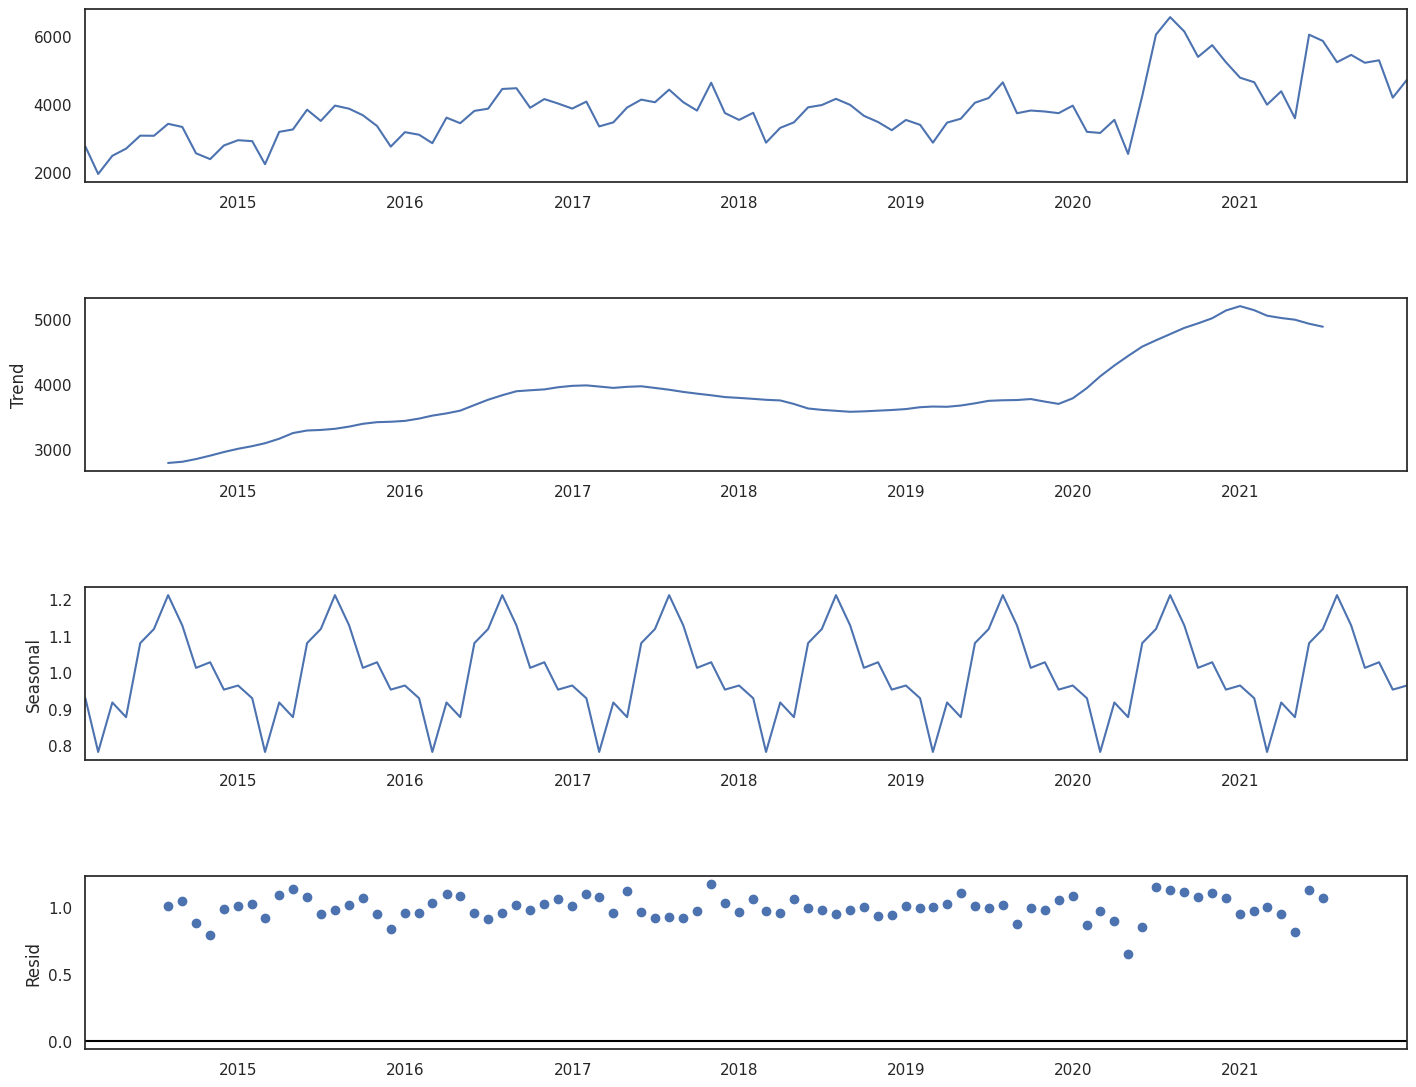

In [ ]:
result = sm.tsa.seasonal_decompose(total_by_month, model='multiplicative')
fig = result.plot()
fig.set_size_inches(16, 12)

##### - Như vậy các thành phần đã được tách ra khá rõ ràng như thể hiện trong biểu đồ trên. Tiếp theo ta sẽ cùng hồi qui mô hình SARIMA.

### 2.5. Hồi qui mô hình SARIMA
### 2.5.1. Phân chia tập train/test
##### - Trở về dataset ban đầu, ta chọn dữ liệu:
  - Tập train là từ 2022 trở về trước
  - Tập test là từ 2022 trở về sau

In [ ]:
# Create dataframe from 2022 to end
df_after_2022 = df_full.query('`Incident_Date` >= 2022')

# Set Incident_Date to index
df_after_2022.reset_index(inplace = True)
df_after_2022.set_index('Incident_Date')

# Create Total column
df_after_2022['Total'] = df_after_2022['Killed'] + df_after_2022['Injured']

# Resample dataset of 2022 to month
total_by_month2 = df_after_2022[['Incident_Date', 'Total']].resample('M', on = 'Incident_Date').sum()

print(total_by_month2)

               Total
Incident_Date       
2022-01-31      4540
2022-02-28      3951
2022-03-31      4626
2022-04-30      4800
2022-05-31      5482
2022-06-30      5416
2022-07-31      6101
2022-08-31      5371
2022-09-30      2343


In [ ]:
train = total_by_month
test = total_by_month2

print("\nTrain shape (before 2022): ", train.shape)
print("Test shape (after 2022): ", test.shape)


Train shape (before 2022):  (96, 1)
Test shape (after 2022):  (9, 1)


##### - Biểu diễn tập train

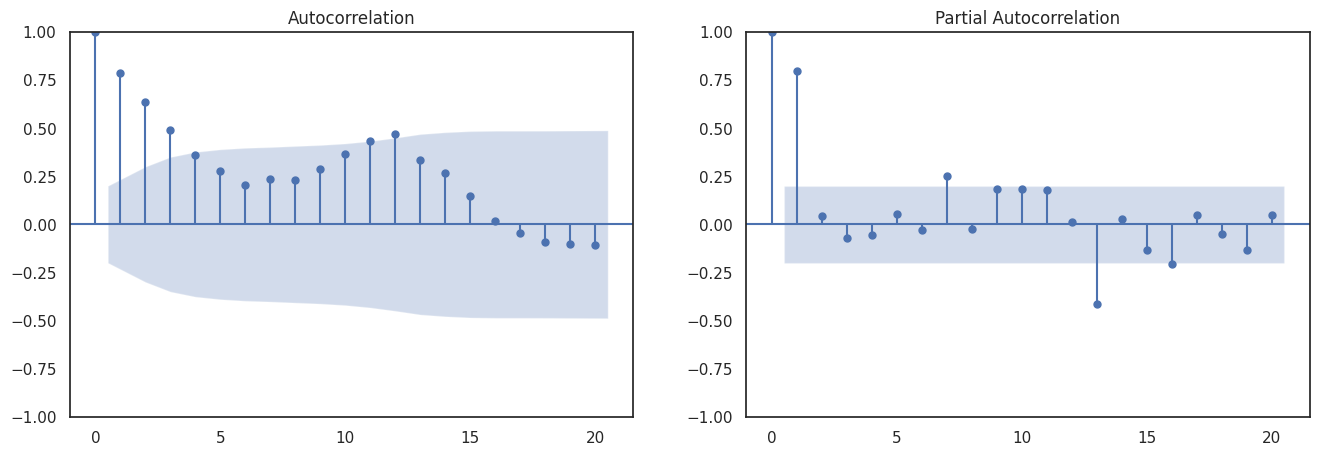

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

plot_acf(train,  title='Autocorrelation', ax = ax[0])
plot_pacf(train,  title='Partial Autocorrelation', ax = ax[1])

plt.show()

### Nhận xét: Như vậy từ biểu đồ ta có thể lựa chọn bậc tự tương quan riêng phần PACF và tự tương quan ACF là các giá trị nhỏ hơn hoặc bằng 5.

### 2.5.2. Xây dựng mô hình SARIMA (seasonal ARIMA)
#### - Do chuỗi có trend nên chúng ta sẽ lấy sai phân bậc 1 để tạo chuỗi dừng, hay nói cách khác bậc của *intergration* $d = 1$.

#### - Để mô hình hiểu được chúng ta đang hồi qui trên mô hình SARIMA thì cần thiết lập tham số `seasonnal = True` và chu kì của mùa vụ `m = 12` (12 tháng).Chiến lược `stepwise` sẽ tự động tìm cho ta một mô hình tốt nhất dựa trên tham số đã thiết lập.

In [ ]:
model_sarima = auto_arima(train, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_sarima.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1272.719, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1286.217, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1276.756, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1268.086, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1284.449, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1270.085, Time=0.99 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1270.085, Time=1.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1272.642, Time=0.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1271.592, Time=2.44 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1262.438, Time=1.35 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1277.713, Time=0.86 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=1264.171, Time=2.32 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1264.039, Time=2.33 sec
 ARIMA(0,1,2)(1,1,0)[12]

#### Nhận xét: Phương pháp `stepwise` đã giúp chúng ta tìm được thông số tốt nhất cho mô hình SARIMA cho bài toán dự báo.

### 2.6. Dự báo

In [ ]:
df_full['Total'] = df_full['Killed'] + df_full['Injured']

In [ ]:
data = df_full[['Incident_Date', 'Total']].resample('M', on = 'Incident_Date').sum()

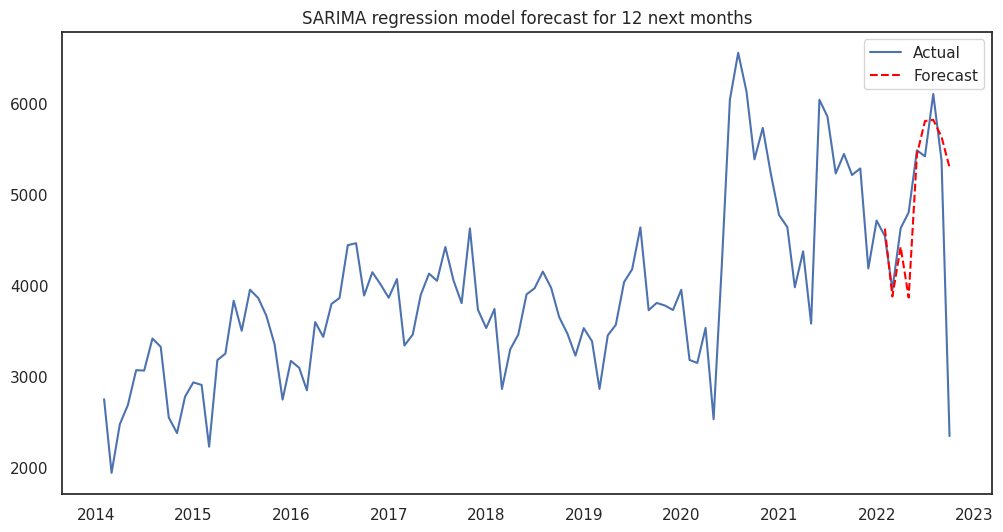

In [ ]:
pred_period = 9

fitted, confint = model_sarima.predict(n_periods = pred_period, return_conf_int=True)
date = test.index

fitted_seri = pd.Series(fitted.values, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

plt.figure(figsize=(12, 6))
plt.plot(data[-360:], label='Actual')
plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')

plt.legend()
plt.title('SARIMA regression model forecast for 12 next months')
plt.show()

### 2.7. Đánh giá mô hình

In [ ]:
def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Mean Square Error: {}'.format(mse))
  print('Root Mean Square Error: {}'.format(rmse))
  print('Mean Absolute Error: {}'.format(mae))
  print('Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test.values[0], fitted)

Mean Square Error: 744759.3700624169
Root Mean Square Error: 862.9944206438515
Mean Absolute Error: 757.6585966843913
Mean Absolute Percentage Error: -0.09557768591286131


## Đánh giá:
  ### - `RMSE`: Biên độ giao động của giá trị dự báo xung quanh giá trị thực tế là 863

  ### - `MAE`: Trung bình sai số giữa giá trị dự báo và giá trị thực tế là 758

  ### - `MAPE`: Sai số giữa giá trị dự báo so với giá trị thực tế bằng khoảng 10%.